# **Desafio Cientista de Dados - Lighthouse**

## Introdução

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

## Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


## Importação das bibliotecas utlizadas

In [3]:
# Executar caso seja necessário
!pip install datasets

In [4]:
import pandas as pd # Biblioteca para o carregamento de datasets a partir de arquivos CSV, Excel e outros formatos
import seaborn as sns # Biblioteca para simplificar o código de geração de gráficos
import matplotlib.pyplot as plt # Biblioteca para gerar gráficos
import string # Biblioteca para tratamento de strings
import numpy as np # Biblioteca para operações matemáticas
from collections import defaultdict # Biblioteca para o tratamento de dicionários
from datasets import Dataset # Biblioteca para o carregamento de datasets a partir de arquivos CSV, Excel e outros formatos
from sklearn.linear_model import LinearRegression # Modelo usado na predição de notas IMDB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split # Necessário para o split entre treinamento e teste e para a otimização de hiperparâmetros
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Modelos usados na predição de notas IMDB
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Biblioteca para o tratamento de dados categóricos
from sklearn.compose import ColumnTransformer # Biblioteca para o tratamento de dados categóricos
from sklearn.pipeline import Pipeline # Necessário para criar pipelines
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error # Métricas usadas do scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer # Biblioteca para o tratamento de texto
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments # Biblioteca para o treinamento de modelos de NLP
import joblib # Biblioteca para salvar e carregar modelos
import warnings # Biblioteca para ignorar avisos
warnings.filterwarnings('ignore')

## Carregamento do arquivo e visualização

In [5]:
# Carregar o arquivo CSV
df = pd.read_csv('desafio_indicium_imdb.csv')

# Visualizar as primeiras linhas do DataFrame
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Coluna Unnamed: 0 retirada

Ao visualizar a base de dados utlizada, percebe-se que a coluna 'Unnamed: 0' não é necessária, pois ela mostra o que já é revelado pelo index da tabela. Por isso, ela foi removida.

In [6]:
# Remover a coluna Unnamed: 0 e mostrar o dataset após a remoção
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Informações iniciais da base de dados

In [7]:
l, c = df.shape
print(f'Quantidade de linhas: {l}')
print(f'Quantidade de colunas: {c}')

Quantidade de linhas: 999
Quantidade de colunas: 15


In [8]:
# Formatação em 3 casas decimais para melhor interpretação das informações estatísticas de cada coluna numérica
pd.set_option('display.float_format', '{:.3f}'.format)

In [9]:
# Dados estatísticos sobre as colunas do tipo numérica
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000,842.000,999.000
mean,7.948,77.969,271621.422
std,0.272,12.383,320912.621
min,7.600,28.000,25088.000
25%,7.700,70.000,55471.500
50%,7.900,79.000,138356.000
75%,8.100,87.000,373167.500
max,9.200,100.000,2303232.000


Percebe-se que apenas 'IMDB_Rating', 'Meta_score' e 'No_of_Votes' são consideradas numéricas. Isso evidencia que há colunas que deveriam ser consideradas numéricas, como 'Runtime' e 'Gross' por exemplo, mas que por algum motivo não o são.

In [10]:
# Informações gerais da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


Aqui já dá para verificar que as variáveis 'Released_Year', 'Runtime' e 'Gross', que deveriam ser consideradas numéricas, estão sendo consideradas objetos. Isso deve ser corrigido. Além disso, vemos que há dados nulos nas colunas 'Certificate', 'Meta_score' e 'Gross'.

In [11]:
# Verificar a quantidade de valores nulos de cada coluna
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Aqui temos as quantidades exatas de dados nulos de cada coluna.

## Tratamento da coluna 'Released_Year'

Para encontrar o que pode ter sido inserido equivocadamente nessa coluna, foi usado um método que mostra todos os valores únicos (sem repetição) dessa coluna.

In [12]:
# Verificar valores únicos na coluna
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

Em meio a vários anos inseridos corretamente, percebe-se que há um 'PG' que não corresponde com o que se espera nessa coluna. Portanto, foi verificado quais são as linhas da base de dados que possuem 'PG' na coluna 'Released_Year'.

In [13]:
# Mostrar as linhas em que há 'PG' na variável 'Released_Year'
df[df['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.600,NASA must devise a strategy to return Apollo 1...,77.000,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


No caso, a única linha que possui 'PG' na variável 'Released_Year' é em relação ao filme 'Apollo 13'. Nesse caso, pesquisando o ano de lançamento desse longa, descobriu-se que ele estreou nos cinemas em 1995. Com isso, foi inserido '1995' no lugar de 'PG' na variável 'Released_Year' para a linha de índice 965.

Apollo 13 (1995): [Apollo 13](https://www.imdb.com/title/tt0112384/)

In [14]:
# Substituir na linha 965, na coluna 'Released_Year', 'PG' por '1995'
df.loc[965, 'Released_Year'] = 1995
df[df['Series_Title'] == 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.600,NASA must devise a strategy to return Apollo 1...,77.000,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Com essa correção realizada, foi feita a conversão dessa variável para o tipo int, pois se trata de valores do conjunto dos números inteiros.

In [15]:
# Trocar o tipo da variável 'Released_Year' para int
df['Released_Year'] = df['Released_Year'].astype(int)

## Tratamento da coluna 'Runtime'

In [16]:
# Verificar valores únicos da coluna 'Runtime'
df['Runtime'].unique()

array(['175 min', '152 min', '202 min', '96 min', '201 min', '154 min',
       '195 min', '148 min', '139 min', '178 min', '142 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

Como visto acima, os valores dessa coluna apresentam uma parte textual indicando os minutos que configura a variável como objeto. Sabendo disso, foi removido o ' min' que equivale ao espaço e o termo min propriamente dito, de todos os valores, e alterado o tipo da variável para int, pois não há valores quebrados. Para deixar claro que esses valores são referentes aos minutos de duração dos filmes, o nome da coluna foi alterado para 'Runtime_min'.

In [17]:
# Remover ' min' dos valores e alterar a variável para o tipo int
df['Runtime'] = df['Runtime'].str.removesuffix(' min').astype(int)

# Renomear a variável para 'Runtime_min'
df.rename(columns={'Runtime':'Runtime_min'}, inplace=True)

## Tratamento da coluna 'Gross'

Como visto anteriormente, na coluna 'Gross' os valores apresentam vírgulas para melhor visualização dos números longos que apresentam muitos algarismos. Todavia, isso faz a coluna ser configurada como objeto. Portanto, todas as vírgulas de todos os valores foram retiradas e logo a seguir a variável foi alterada para ser do tipo float, pois se tratando da receita bruta do faturamento, os cents podem ser considerados.

In [18]:
# Retirar todas as vírgulas e mudar 'Gross' para ser do tipo float
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime_min    999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


Aqui pode-se constatar que as colunas que devem ser numéricas de fato são numéricas. As que recebem strings como valor são configuradas como objetos.

## Tratamento dos dados nulos

In [19]:
# Verificar novamente os dados nulos em cada coluna
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime_min        0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

A seguir, segue a explicação dos motivos dos métodos de tratamento dos dados nulos para cada coluna.

1. **Certificate (Classificação Etária)**
Descrição: É uma variável categórica que indica a classificação etária do filme.

Número de Nulos: 101 nulos (aproximadamente 10.1% do total).

Método Sugerido: Imputação com a moda.

Motivo: Como 'Certificate' é uma variável categórica e os valores nulos representam aproximadamente 10% do dataset, imputar com a moda (valor mais frequente) é uma abordagem razoável. Isso minimiza a introdução de viés significativo, mantendo a distribuição da variável.


2. **Meta_score (Pontuação da Crítica)**
Descrição: É uma variável numérica que representa a média ponderada de todas as críticas.

Número de Nulos: 157 nulos (aproximadamente 15.7% do total).

Método Sugerido: Imputação com a média.

Motivo: 'Meta_score' é uma variável contínua e os valores nulos representam uma porção maior do dataset (15.7%). Imputar com a média mantém a média da distribuição original e é uma prática comum quando os dados são razoavelmente distribuídos.


3. **Gross (Faturamento Bruto)**
Descrição: É uma variável numérica que representa o faturamento bruto de um filme.

Número de Nulos: 169 nulos (aproximadamente 16.9% do total).

Método Sugerido: Imputação com a mediana.

Motivo: 'Gross' pode ter uma distribuição assimétrica, com valores extremos que podem distorcer a média. A imputação com a mediana é mais robusta em relação a outliers e preserva melhor a característica central da distribuição dos dados.


Ao utilizar esses métodos de imputação, foi garantido que os dados nulos sejam tratados de maneira a preservar a integridade e a distribuição das variáveis. Isso ajuda a assegurar que as futuras análises e modelagens preditivas não sejam comprometidas por valores faltantes.


In [20]:
# Tratar dados nulos
df['Certificate'].fillna(df['Certificate'].mode()[0], inplace=True)
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
df['Gross'].fillna(df['Gross'].median(), inplace=True)

# Verificar se todos os valores nulos foram tratados
print(df.isnull().sum())

Series_Title     0
Released_Year    0
Certificate      0
Runtime_min      0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


## Tratamento da coluna 'Certificate'

In [21]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'PG', 'G', 'Passed', 'TV-14', '16',
       'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'], dtype=object)

A coluna que se refere à classificação etária dos filmes possui símbolos e abreviaturas vindas de padrões de diferentes países e de contextos históricos. Isso pode atrapalhar as futuras  análises de dados. Sendo assim, foi necessário entender de onde veio essas classificações únicas da coluna e adotar um padrão para usar em todos os filmes.

## Sistemas de classificação de conteúdo cinematográfico de alguns países

**United States (MPAA - Motion Picture Association of America)**


*   G: General Audiences. Todos os públicos.

    PG: Parental Guidance. Orientação dos pais sugerida. Alguns conteúdos podem não ser adequados para crianças.

    PG-13: Parents Strongly Cautioned. Alguns conteúdos podem ser inapropriados para crianças menores de 13 anos.

    R: Restricted. Acompanhamento dos pais é necessário para menores de 17 anos.
    NC-17: No One 17 and Under Admitted. Não é permitido para menores de 18 anos.

    Unrated: Filme não classificado.

**United Kingdom (BBFC - British Board of Film Classification)**
*   U: Universal. Adequado para todos.

    PG: Parental Guidance. Adequado para a maioria das idades, mas pode haver cenas não apropriadas para crianças pequenas.

    12A: Filme para maiores de 12 anos, mas crianças menores de 12 anos podem assistir acompanhadas de um adulto.

    15: Apenas para maiores de 15 anos.

    18: Apenas para maiores de 18 anos.

**India (CBFC - Central Board of Film Certification)**


*   U: Universal. Adequado para todas as idades.

    UA: Universal/Adultos (12 anos ou mais). Pode ser assistido por crianças com supervisão dos pais.

    U/A: Similar a "UA". Pode variar em representação.

    A: Adultos (18 anos ou mais). Indicado apenas para público adulto.

**Television Ratings (variam por país)**


*   TV-G: General Audience. Apropriado para todos.

    TV-PG: Parental Guidance Suggested. Pode conter material inadequado para crianças.

    TV-14: Parents Strongly Cautioned. Não recomendado para menores de 14 anos sem supervisão dos pais.

    TV-MA: Mature Audience Only. Apenas para adultos.

**Outros**


*   Passed: Uma classificação antiga usada pela MPAA, indicando que o filme foi aprovado para exibição.

    Approved: Uma classificação antiga da MPAA similar ao "Passed".

    GP: Originalmente "General Patronage" ou "General Public", um rótulo antigo que foi substituído por "PG" em 1972.

    16: Usada em alguns países (como Alemanha) para indicar que o conteúdo é apropriado para maiores de 16 anos.

Fontes: https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#
    
https://en.wikipedia.org/wiki/Motion_picture_content_rating_system

Sabendo desses padrões, foi escolhido o sistema dos Estados Unidos, o Motion Picture Association of America (MPAA) para padronizar as classificações etárias dos filmes dessa base de dados. Para isso, foi desenvolvida uma função para mapear os valores da coluna 'Certificate' e fazer as devidas alterações em todos os valores.

In [22]:
# Função para mapear os valores da coluna 'Certificate'
def map_certificate(value):
    if value in ['U', 'G', 'TV-G']:
        return 'G'
    elif value in ['PG', 'GP', 'TV-PG', '12A', '12', 'UA', 'U/A']:
        return 'PG'
    elif value in ['PG-13', 'TV-13', 'TV-14', '13', '14', '15', '16']:
        return 'PG-13'
    elif value in ['R', 'A', 'TV-MA', 'NC-17', '17', '18']:
        return 'R'
    else:
        return 'Unrated'

# Aplicar a função na coluna 'Certificate'
df['Certificate'] = df['Certificate'].apply(map_certificate)

# Verificar os resultados
print(df['Certificate'].value_counts())

Certificate
G          347
R          343
PG         218
Unrated     46
PG-13       45
Name: count, dtype: int64


## Melhoramento das separações dos gêneros para futuras análises

A coluna 'Genre' é uma coluna que requer atenção. Se não for feita alterações nela, pode-se ter como gênero algo como 'Adventure, Comedy, War', por exemplo. Todas essas combinações de gêneros podem fazer com que as análises referentes à essa coluna sejam comprometidas. Devido a isso, foi feita uma verificação da quantidade máxima de gêneros que um filme pode ter.

In [23]:
# Contar o número de gêneros por filme
df['Num_Genres'] = df['Genre'].apply(lambda x: len(x.split(',')))

# Encontrar o limite máximo de gêneros
max_genres = df['Num_Genres'].max()

# Exibir o resultado
print("O limite máximo de gêneros de um filme no dataset é:", max_genres)

O limite máximo de gêneros de um filme no dataset é: 3


Sabendo que a quantidade máxima de gêneros são 3, foi criada três novas colunas de gêneros.

In [24]:
# Separar os gêneros em três colunas e remover espaços em branco
genres_split = df['Genre'].str.split(',', expand=True)
df['Genre1'] = genres_split[0].str.strip()
df['Genre2'] = genres_split[1].str.strip().fillna('No Genre')
df['Genre3'] = genres_split[2].str.strip().fillna('No Genre')

In [25]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime_min,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Num_Genres,Genre1,Genre2,Genre3
0,The Godfather,1972,R,175,"Crime, Drama",9.200,An organized crime dynasty's aging patriarch t...,100.000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.000,2,Crime,Drama,No Genre
1,The Dark Knight,2008,PG,152,"Action, Crime, Drama",9.000,When the menace known as the Joker wreaks havo...,84.000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.000,3,Action,Crime,Drama
2,The Godfather: Part II,1974,R,202,"Crime, Drama",9.000,The early life and career of Vito Corleone in ...,90.000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.000,2,Crime,Drama,No Genre
3,12 Angry Men,1957,G,96,"Crime, Drama",9.000,A jury holdout attempts to prevent a miscarria...,96.000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.000,2,Crime,Drama,No Genre
4,The Lord of the Rings: The Return of the King,2003,G,201,"Action, Adventure, Drama",8.900,Gandalf and Aragorn lead the World of Men agai...,94.000,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.000,3,Action,Adventure,Drama


Com as 3 colunas de gêneros criadas, a coluna 'Genre' não é mais necessária.

In [26]:
# Excluir a coluna original 'Genre'
df.drop('Genre', axis=1, inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime_min,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Num_Genres,Genre1,Genre2,Genre3
0,The Godfather,1972,R,175,9.200,An organized crime dynasty's aging patriarch t...,100.000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.000,2,Crime,Drama,No Genre
1,The Dark Knight,2008,PG,152,9.000,When the menace known as the Joker wreaks havo...,84.000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.000,3,Action,Crime,Drama
2,The Godfather: Part II,1974,R,202,9.000,The early life and career of Vito Corleone in ...,90.000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.000,2,Crime,Drama,No Genre
3,12 Angry Men,1957,G,96,9.000,A jury holdout attempts to prevent a miscarria...,96.000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.000,2,Crime,Drama,No Genre
4,The Lord of the Rings: The Return of the King,2003,G,201,8.900,Gandalf and Aragorn lead the World of Men agai...,94.000,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.000,3,Action,Adventure,Drama


Após essas alterações, foi verificado os gêneros únicos e a quantidade de filmes que cada um possui.

In [27]:
# Listar gêneros únicos e sua quantidade, removendo espaços em branco
unique_genres = pd.concat([df['Genre1'], df['Genre2'], df['Genre3']]).dropna().str.strip().unique()
unique_genres_count = pd.concat([df['Genre1'], df['Genre2'], df['Genre3']]).dropna().str.strip().value_counts()

# Mostrar a lista de gêneros únicos e a quantidade
print("Gêneros únicos:")
print(unique_genres)

print("\nQuantidade de cada gênero:")
print(unique_genres_count)

Gêneros únicos:
['Crime' 'Action' 'Biography' 'Drama' 'Western' 'Comedy' 'Adventure'
 'Animation' 'Horror' 'Mystery' 'Film-Noir' 'Fantasy' 'Family' 'Thriller'
 'No Genre' 'Romance' 'Sci-Fi' 'War' 'Music' 'Musical' 'Sport' 'History']

Quantidade de cada gênero:
Drama        723
No Genre     457
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64


## Verificação de duplicidade nas linhas e nos nomes dos filmes

Antes de finalizar o tratamento da base de dados, é interessante verificar se existem duplicidades nas linhas ou ao menos nos nomes dos filmes.

In [28]:
# Verificar linhas duplicadas
duplicated_rows = df[df.duplicated()]
print(f"Total de linhas duplicadas: {len(duplicated_rows)}")
if not duplicated_rows.empty:
    print("Linhas duplicadas:")
    print(duplicated_rows)

Total de linhas duplicadas: 0


In [29]:
# Verificar valores repetidos na coluna 'Series_Title'
duplicated_titles = df[df.duplicated(subset=['Series_Title'], keep=False)]
print(f"Total de títulos duplicados: {duplicated_titles['Series_Title'].nunique()}")
if not duplicated_titles.empty:
    print("Títulos duplicados e suas ocorrências:")
    print(duplicated_titles.sort_values('Series_Title'))

Total de títulos duplicados: 1
Títulos duplicados e suas ocorrências:
    Series_Title  Released_Year Certificate  Runtime_min  IMDB_Rating  \
86      Drishyam           2013           G          160        8.300   
135     Drishyam           2015          PG          163        8.200   

                                              Overview  Meta_score  \
86   A man goes to extreme lengths to save his fami...      77.969   
135  Desperate measures are taken by a man who trie...      77.969   

            Director       Star1         Star2         Star3         Star4  \
86     Jeethu Joseph    Mohanlal         Meena  Asha Sharath        Ansiba   
135  Nishikant Kamat  Ajay Devgn  Shriya Saran          Tabu  Rajat Kapoor   

     No_of_Votes        Gross  Num_Genres Genre1 Genre2    Genre3  
86         30722 23457439.500           3  Crime  Drama  Thriller  
135        70367   739478.000           3  Crime  Drama   Mystery  


Existem dois filmes com o nome 'Drishyam'. Todavia, de fato esses dois filmes são diferentes, mesmo possuindo nomes idênticos. Por isso, nenhuma alteração será feita.

Drishyam de 2013: [Drishyam (2013)](https://www.imdb.com/title/tt3417422/)

Drishyam de 2015: [Drishyam (2015)](https://www.imdb.com/title/tt4430212/)

## Verificação do dataset antes das análises

In [30]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime_min,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Num_Genres,Genre1,Genre2,Genre3
0,The Godfather,1972,R,175,9.200,An organized crime dynasty's aging patriarch t...,100.000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.000,2,Crime,Drama,No Genre
1,The Dark Knight,2008,PG,152,9.000,When the menace known as the Joker wreaks havo...,84.000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.000,3,Action,Crime,Drama
2,The Godfather: Part II,1974,R,202,9.000,The early life and career of Vito Corleone in ...,90.000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.000,2,Crime,Drama,No Genre
3,12 Angry Men,1957,G,96,9.000,A jury holdout attempts to prevent a miscarria...,96.000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.000,2,Crime,Drama,No Genre
4,The Lord of the Rings: The Return of the King,2003,G,201,8.900,Gandalf and Aragorn lead the World of Men agai...,94.000,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.000,3,Action,Adventure,Drama


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime_min    999 non-null    int64  
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     999 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    float64
 14  Num_Genres     999 non-null    int64  
 15  Genre1         999 non-null    object 
 16  Genre2         999 non-null    object 
 17  Genre3         999 non-null    object 
dtypes: float64

Todas as alterações necessárias foram realizadas. A partir daqui, a base de dados está tratada e pronta para a análise exploratória dos dados e construções de modelos de machine learning.

## Análise Exploratória de Dados (EDA)

## Matriz de correlação das variáveis numéricas

Foi verificado as correlações das variáveis numéricas. Um gráfico de mapa de calor da matriz de correlação foi gerada para melhor visualização.

In [32]:
# Verificar a correlação entre as variáveis
numerical_df = df.select_dtypes(include=['number'])  # Selecionar apenas colunas numéricas
correlation_matrix = numerical_df.corr()  # Calcular correlações de dados numéricos
print(correlation_matrix)

               Released_Year  Runtime_min  IMDB_Rating  Meta_score  \
Released_Year          1.000        0.166       -0.133      -0.289   
Runtime_min            0.166        1.000        0.243      -0.028   
IMDB_Rating           -0.133        0.243        1.000       0.256   
Meta_score            -0.289       -0.028        0.256       1.000   
No_of_Votes            0.246        0.172        0.479      -0.019   
Gross                  0.233        0.139        0.088      -0.045   
Num_Genres             0.066        0.002       -0.049      -0.059   

               No_of_Votes  Gross  Num_Genres  
Released_Year        0.246  0.233       0.066  
Runtime_min          0.172  0.139       0.002  
IMDB_Rating          0.479  0.088      -0.049  
Meta_score          -0.019 -0.045      -0.059  
No_of_Votes          1.000  0.603       0.071  
Gross                0.603  1.000       0.130  
Num_Genres           0.071  0.130       1.000  


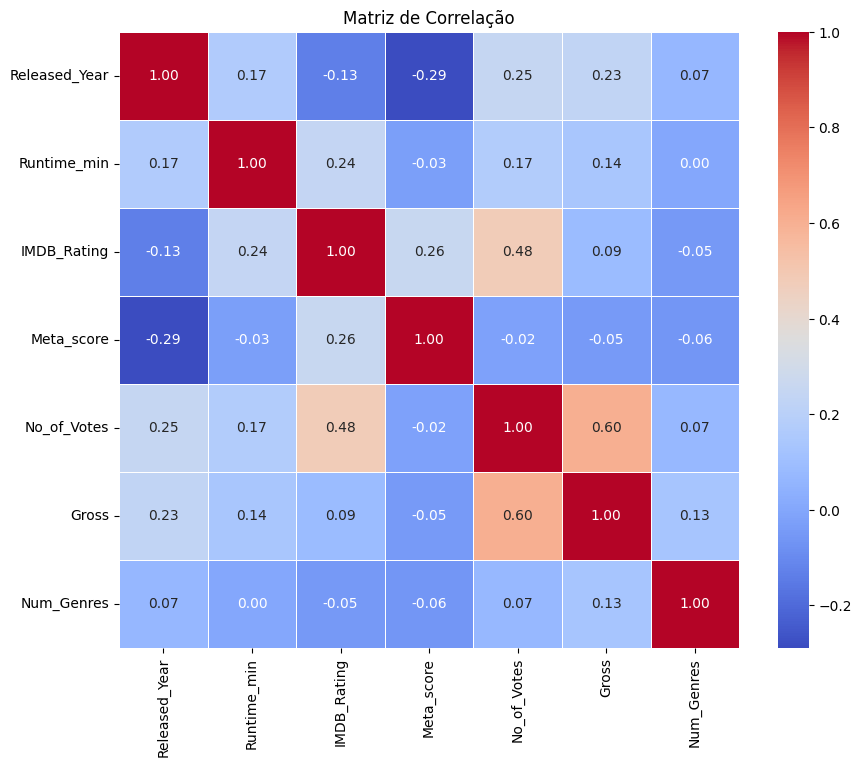

In [33]:
# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Os valores de correlação podem cair entre -1 e +1. Se as duas variáveis tendem a aumentar e diminuir juntas, o valor de correlação é positivo. Se uma variável aumenta enquanto a outra variável diminui, o valor de correlação é negativo.

O coeficiente de correlação de Pearson pode ser interpretado da seguinte forma:

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte

ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação

Sabendo das informações acima, foi analisado as correlações. Abaixo segue as correlações mais fortes para cada uma das variáveis.

Released_Year: não possui correlação com nenhuma outra variável.

Runtime_min: não possui correlação com nehuma outra variável.

IMDB_Rating: 0,48 com No_of_Votes (correlação fraca).

Meta_score: não possui correlação com nehuma outra variável.

No_of_Votes: 0,48 com IMDB_Rating (correlação fraca) e 0,60 com Gross (correlação moderada).

Gross: 0,60 com No_of_Votes (correlação moderada).

Num_Genres: não possui correlação com nehuma outra variável.

O que pode-se afirmar é que o número de votos de um filme influencia de forma moderada o quanto esse filme fatura. Além disso, em alguns filmes, quanto maior a nota IMDB, maior a receita bruta do faturamento.

## Boxplot da relação entre 'Gross' e 'Certificate'

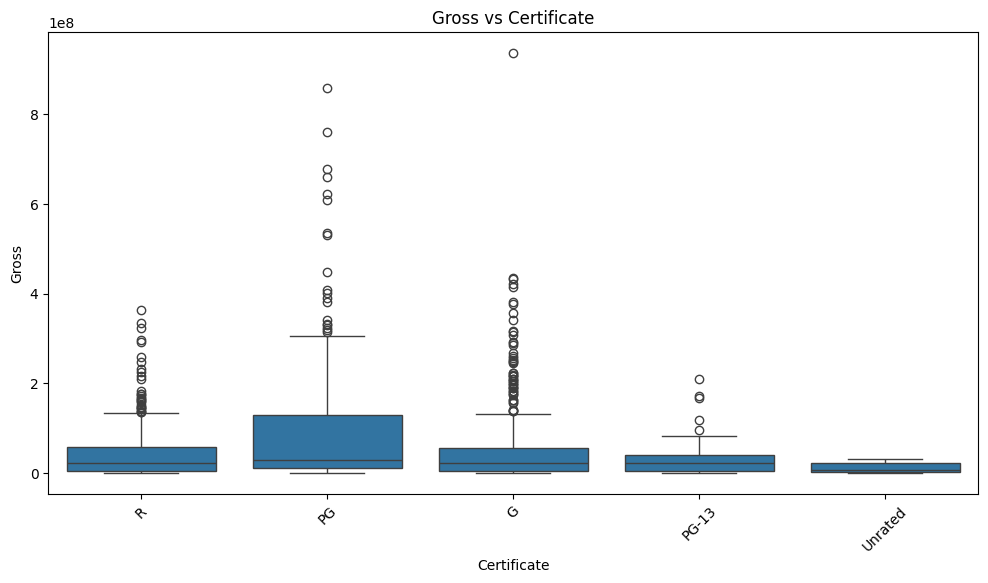

In [34]:
# Plotar 'Gross' vs 'Certificate'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Certificate', y='Gross', data=df)
plt.title('Gross vs Certificate')
plt.xticks(rotation=45)
plt.show()

## Gêneros que mais lucraram em bilheteria

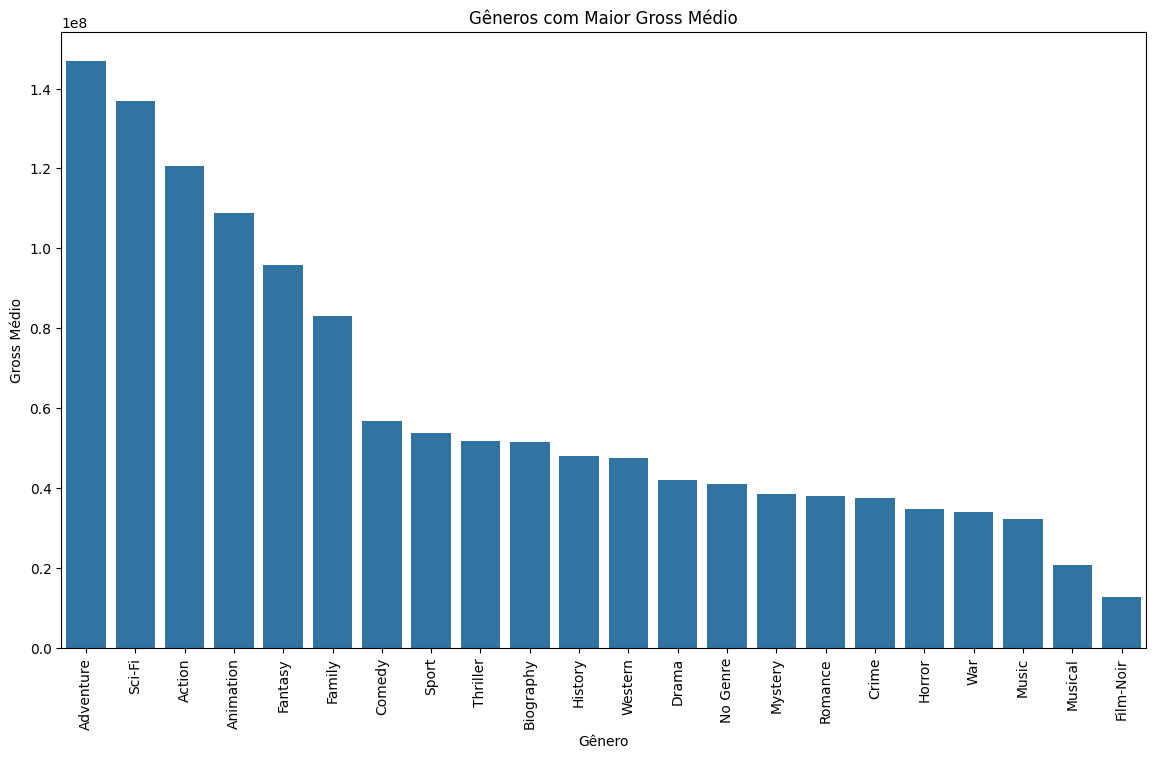

In [35]:
# Derreter as colunas de gênero em uma única coluna
df_melted = df.melt(id_vars=['Series_Title', 'Released_Year', 'Gross'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='Genre_Type', value_name='Genre')

# Remover linhas com 'Genre' nulo
df_melted = df_melted.dropna(subset=['Genre'])

# Calcular o 'Gross' médio por gênero
genre_gross_mean = df_melted.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

# Plotar o gráfico de colunas verticais
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_gross_mean.index, y=genre_gross_mean.values)
plt.title('Gêneros com Maior Gross Médio')
plt.xlabel('Gênero')
plt.ylabel('Gross Médio')
plt.xticks(rotation=90)
plt.show()

Os 5 gêneros que mais tiveram lucro médios em seus faturamentos foram aventura, sci-fi, ação, animação e fantasia, nessa ordem respectivamente.

## Diretores que mais lucraram em bilheteria

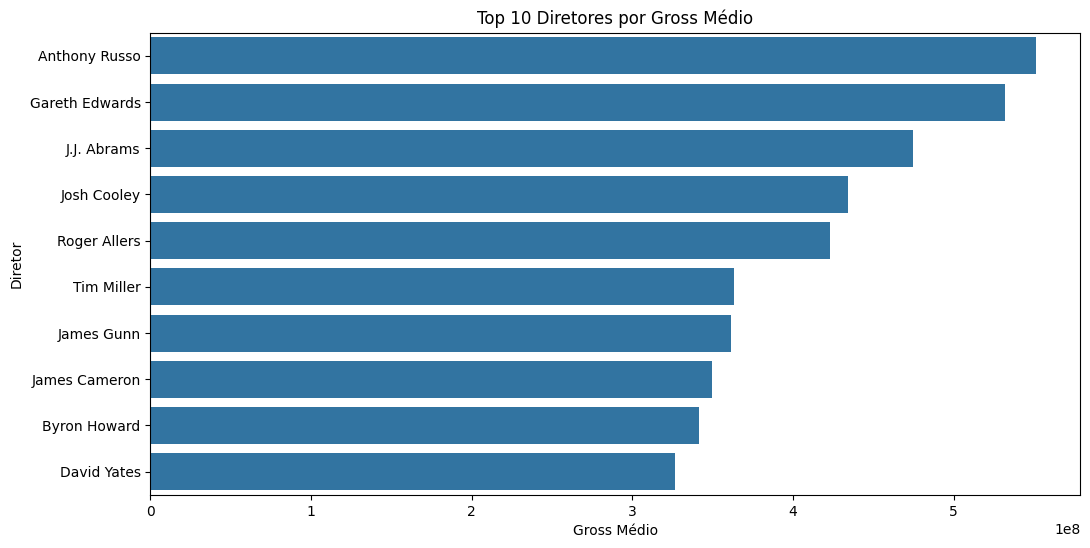

In [36]:
# Calcular a média de 'Gross' por 'Director'
director_gross_mean = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)

# Plotar 'Gross' vs 'Director'
plt.figure(figsize=(12, 6))
sns.barplot(x=director_gross_mean.values, y=director_gross_mean.index)
plt.title('Top 10 Diretores por Gross Médio')
plt.xlabel('Gross Médio')
plt.ylabel('Diretor')
plt.show()

Esses são os 10 diretores mais associados à filmes que obtiveram altos lucros nas bilheterias.

## Atores/atrizes principais que mais lucraram em bilheterias

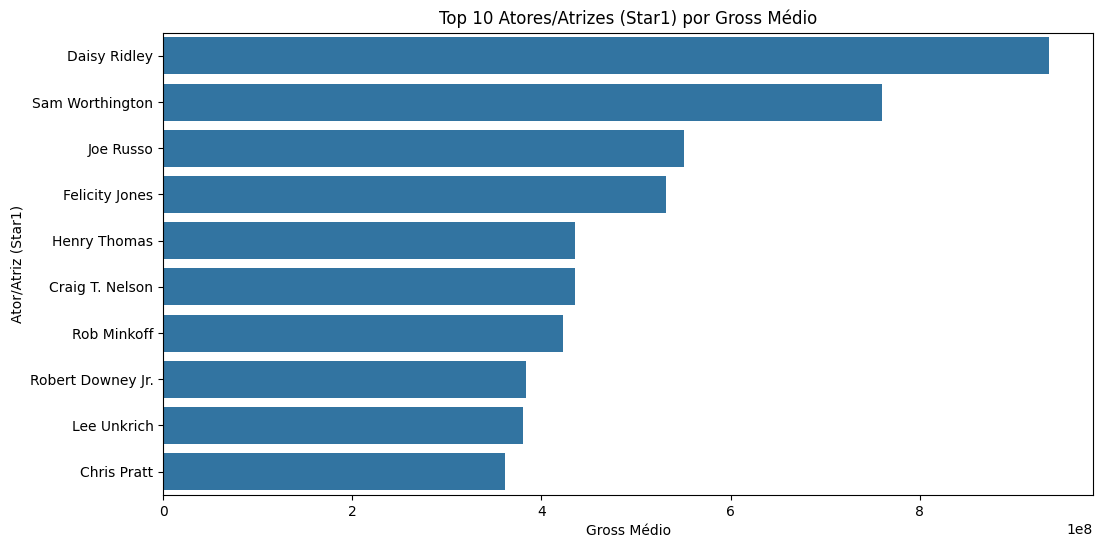

In [37]:
# Calcular a média de 'Gross' por 'Star1'
star1_gross_mean = df.groupby('Star1')['Gross'].mean().sort_values(ascending=False).head(10)

# Plotar 'Gross' vs 'Star1'
plt.figure(figsize=(12, 6))
sns.barplot(x=star1_gross_mean.values, y=star1_gross_mean.index)
plt.title('Top 10 Atores/Atrizes (Star1) por Gross Médio')
plt.xlabel('Gross Médio')
plt.ylabel('Ator/Atriz (Star1)')
plt.show()

## Atores/atrizes coadjuvantes de 2º nível que mais lucraram em bilheterias

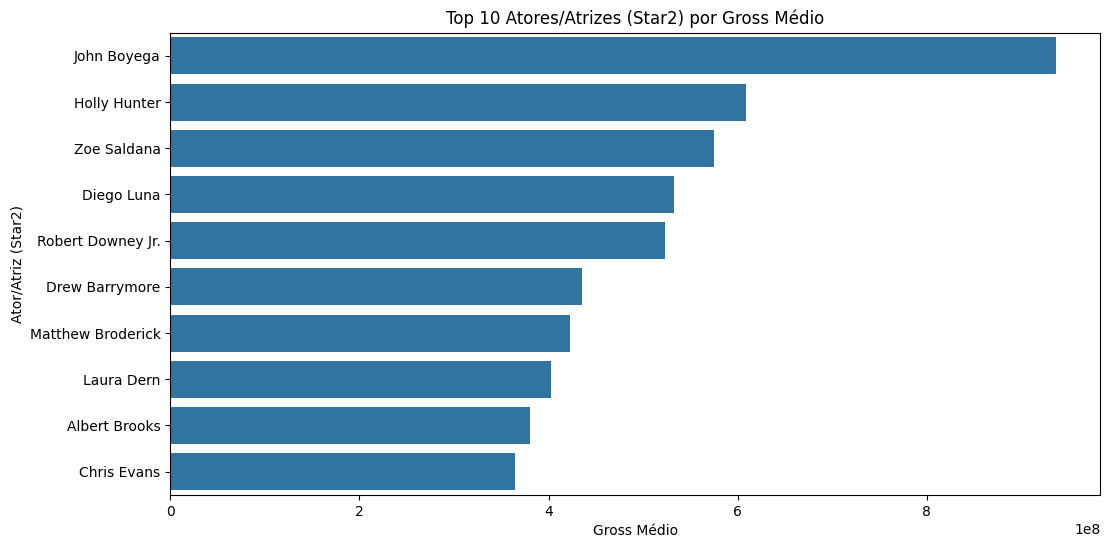

In [38]:
# Calcular a média de 'Gross' por 'Star2'
star2_gross_mean = df.groupby('Star2')['Gross'].mean().sort_values(ascending=False).head(10)

# Plotar 'Gross' vs 'Star2'
plt.figure(figsize=(12, 6))
sns.barplot(x=star2_gross_mean.values, y=star2_gross_mean.index)
plt.title('Top 10 Atores/Atrizes (Star2) por Gross Médio')
plt.xlabel('Gross Médio')
plt.ylabel('Ator/Atriz (Star2)')
plt.show()

## Atores/atrizes coadjuvantes de 3º nível que mais lucraram em bilheterias

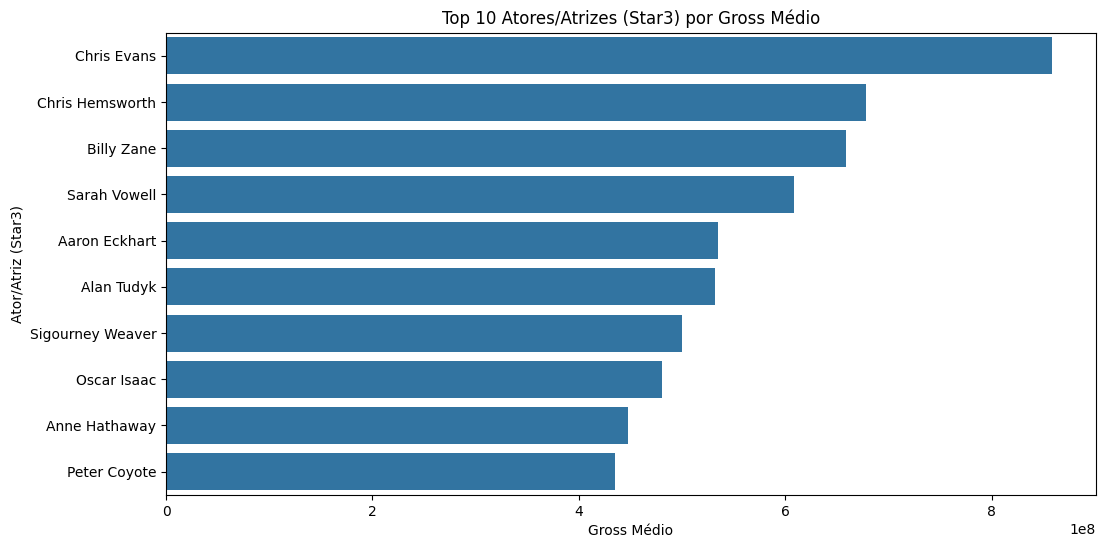

In [39]:
# Calcular a média de 'Gross' por 'Star3'
star3_gross_mean = df.groupby('Star3')['Gross'].mean().sort_values(ascending=False).head(10)

# Plotar 'Gross' vs 'Star3'
plt.figure(figsize=(12, 6))
sns.barplot(x=star3_gross_mean.values, y=star3_gross_mean.index)
plt.title('Top 10 Atores/Atrizes (Star3) por Gross Médio')
plt.xlabel('Gross Médio')
plt.ylabel('Ator/Atriz (Star3)')
plt.show()

## Atores/atrizes coadjuvantes de 4º nível que mais lucraram em bilheterias

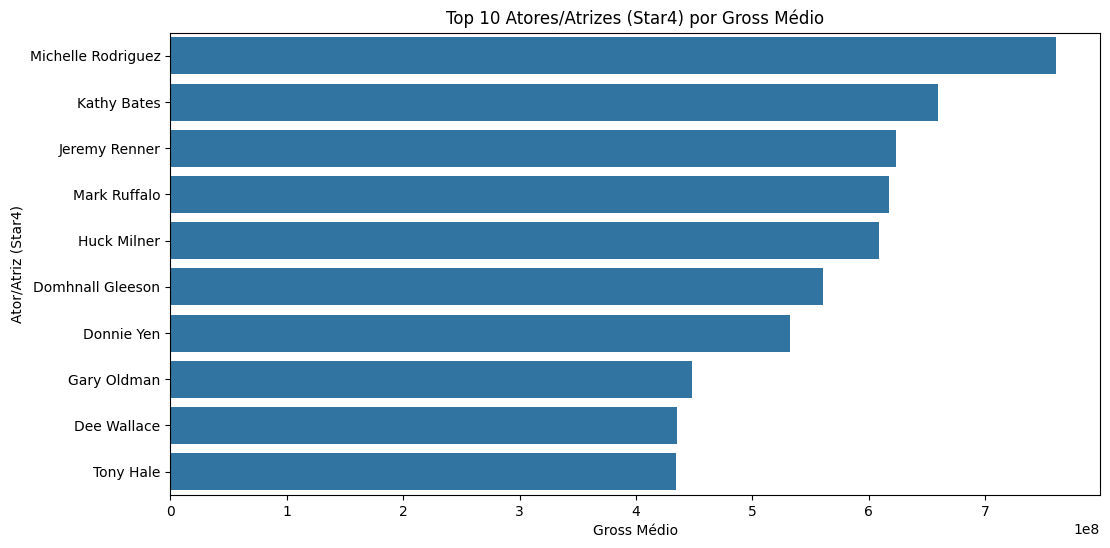

In [40]:
# Calcular a média de 'Gross' por 'Star4'
star4_gross_mean = df.groupby('Star4')['Gross'].mean().sort_values(ascending=False).head(10)

# Plotar 'Gross' vs 'Star4'
plt.figure(figsize=(12, 6))
sns.barplot(x=star4_gross_mean.values, y=star4_gross_mean.index)
plt.title('Top 10 Atores/Atrizes (Star4) por Gross Médio')
plt.xlabel('Gross Médio')
plt.ylabel('Ator/Atriz (Star4)')
plt.show()

Acima foi mostrado as estrelas de cinema que mais participaram de filmes lucrativos. Os nomes desses artistas estão relacionados à filmes de sucesso em bilheterias.

## Atores/atrizes que se repetiram nas relações anteriores (demonstrando muita relação com lucro nas bilheterias)

In [41]:
# Calcular a média de 'Gross' por 'Star1', 'Star2', 'Star3', 'Star4'
star1_gross_mean = df.groupby('Star1')['Gross'].mean().sort_values(ascending=False).head(10)
star2_gross_mean = df.groupby('Star2')['Gross'].mean().sort_values(ascending=False).head(10)
star3_gross_mean = df.groupby('Star3')['Gross'].mean().sort_values(ascending=False).head(10)
star4_gross_mean = df.groupby('Star4')['Gross'].mean().sort_values(ascending=False).head(10)

# Combinar todos os top 10 em uma única lista
top_actors = pd.concat([star1_gross_mean, star2_gross_mean, star3_gross_mean, star4_gross_mean]).reset_index()

# Contar a frequência de cada ator/atriz na lista
actor_counts = top_actors['index'].value_counts()

# Filtrar atores/atrizes que aparecem 2 ou mais vezes
actors_with_multiple_appearances = actor_counts[actor_counts >= 2]

# Exibir o resultado
print("Atores/Atrizes que apareceram 2 ou mais vezes nos top 10:")
print(actors_with_multiple_appearances)

Atores/Atrizes que apareceram 2 ou mais vezes nos top 10:
index
Chris Evans          2
Robert Downey Jr.    2
Name: count, dtype: int64


Chris Evans e Robert Downey Jr. são os dois únicos atores que mais apareceram nas relações de atores principais e atores coadjuvantes do 2º nível ao 4º nível, com ambos com duas aparições. Isso pode ser explicado tendo em vista os numerosos filmes do Universo Cinematográfico da Marvel, que em sua maioria foram bem populares, no qual esses dois atores tiveram muitas participações. Não só isso, os personagens que esses atores representavam (Capitão América e Homem de Ferro) foram bem populares na época, o que pode ter sido motivo para atrair muito público para os cinemas quando foram lançados filmes com a presença desses atores interpretando esses personagens.

## Quantidade de filmes dos 5 gêneros mais lucrativos ao longo dos anos

Foi feita uma análise dos 5 gêneros mais lucrativos ao longo dos anos para que insights possam ser extraídos.

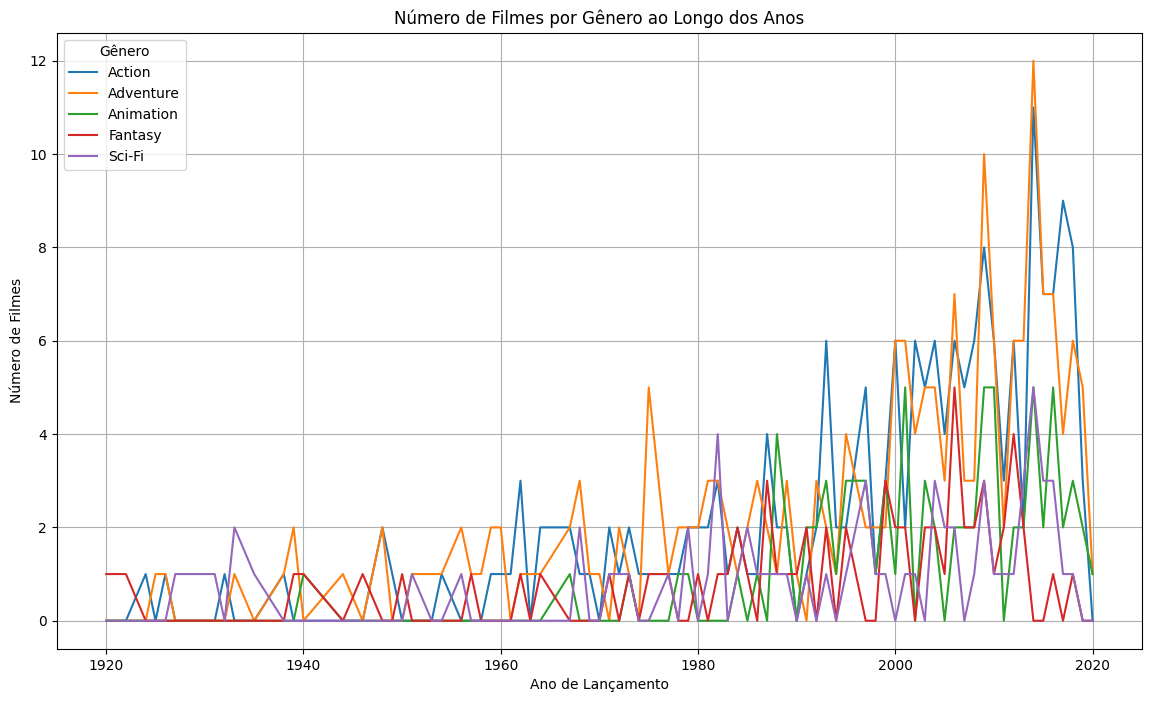

In [42]:
# Derreter as colunas de gênero em uma única coluna
df_melted = df.melt(id_vars=['Series_Title', 'Released_Year'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='Genre_Type', value_name='Genre')

# Remover linhas com 'Genre' nulo
df_melted = df_melted.dropna(subset=['Genre'])

# Filtrar apenas os gêneros desejados
desired_genres = ['Adventure', 'Sci-Fi', 'Action', 'Animation', 'Fantasy']
df_filtered = df_melted[df_melted['Genre'].isin(desired_genres)]

# Contar o número de filmes por gênero e por ano
genre_year_counts = df_filtered.groupby(['Released_Year', 'Genre']).size().unstack(fill_value=0)

# Plotar gráficos de linha para cada gênero
plt.figure(figsize=(14, 8))
for genre in genre_year_counts.columns:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)

plt.title('Número de Filmes por Gênero ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')
plt.legend(title='Gênero')
plt.grid(True)
plt.show()

Com o eixo X contendo 100 anos de uma extremidade a outra (1920 até 2020), fica difícil a análise devido a compressão das linhas nos momentos de altas e quedas, principalmente quando há linhas sobrepostas. Sendo assim, foi definido que a análise partiria do ano 2000 para frente, contendo apenas 20 anos de análises que corresponde ao século XXI. Isso facilita a compreensão dos dados e permite que a análise seja mais focada nas tendências mais recentes.

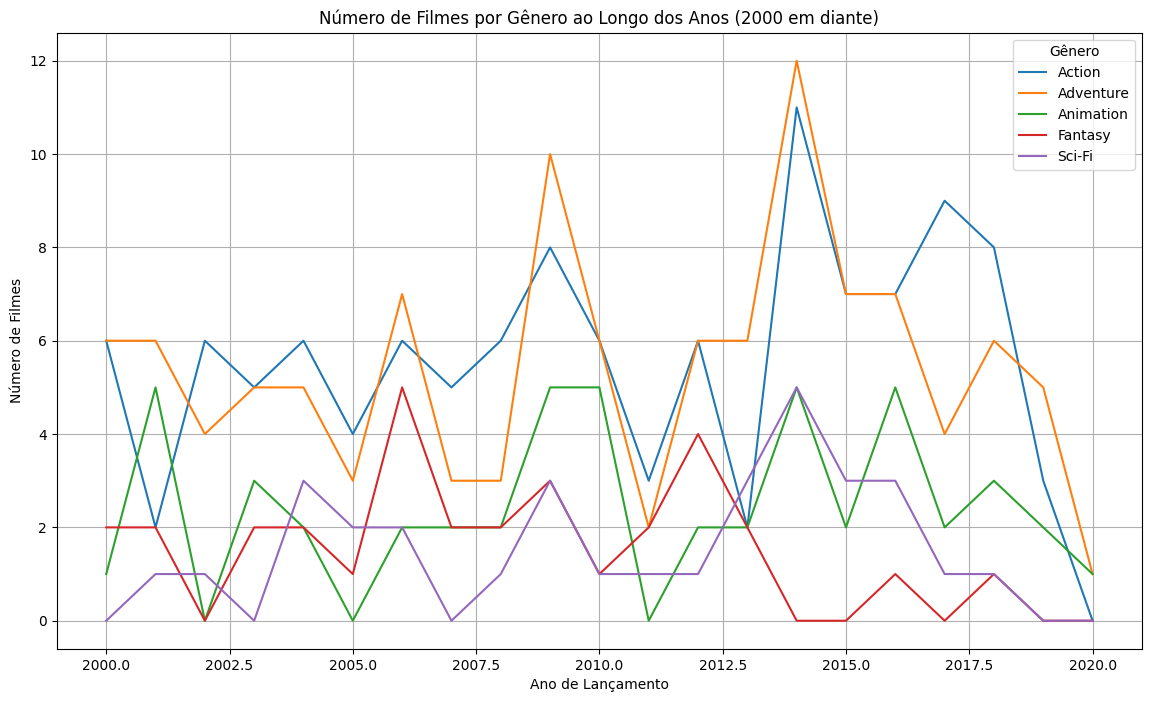

In [43]:
# Filtrar os filmes lançados a partir do ano 2000
df_filtered['Released_Year'] = pd.to_numeric(df_filtered['Released_Year'], errors='coerce')
df_filtered = df_filtered[df_filtered['Released_Year'] >= 2000]

# Contar o número de filmes por gênero e por ano
genre_year_counts = df_filtered.groupby(['Released_Year', 'Genre']).size().unstack(fill_value=0)

# Plotar gráficos de linha para cada gênero
plt.figure(figsize=(14, 8))
for genre in genre_year_counts.columns:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)

plt.title('Número de Filmes por Gênero ao Longo dos Anos (2000 em diante)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Filmes')
plt.legend(title='Gênero')
plt.grid(True)
plt.show()

Os gêneros mais lucrativos de filmes que mais se mantiveram em alta ao longo do século XXI foram aventura e ação. Esses dois gêneros, muitas vezes subiam e desciam juntos, evidenciando que alguns filmes lançados tinham elementos de aventura e ação. Em alguns outros momentos, esses gêneros se distinguiam como em meados de 2016 para 2017 que houve um aumento nos lançamentos de filmes de ação e uma diminuição nos filmes de aventura. Os filmes de sci-fi atingiram seu ápice próximo de 2013 e 2014, sofrendo uma queda desde então. Desde 2011 a 2012, os filmes de fantasia estão em baixa, com um filme sendo lançado vez ou outra. Já os filmes de animações apresentam uma oscilação entre picos de 5 filmes até zero filmes lançados no ano, mas apresentando um comportamento de que esse gênero se mantém como um dos mais populares, abaixo de ação e aventura, dentre esses 5 gêneros mais rentáveis selecionados.

## Filmes com maiores Nº de votos, maiores notas IMDB, maiores médias ponderadas da crítica especializada e maiores faturamentos

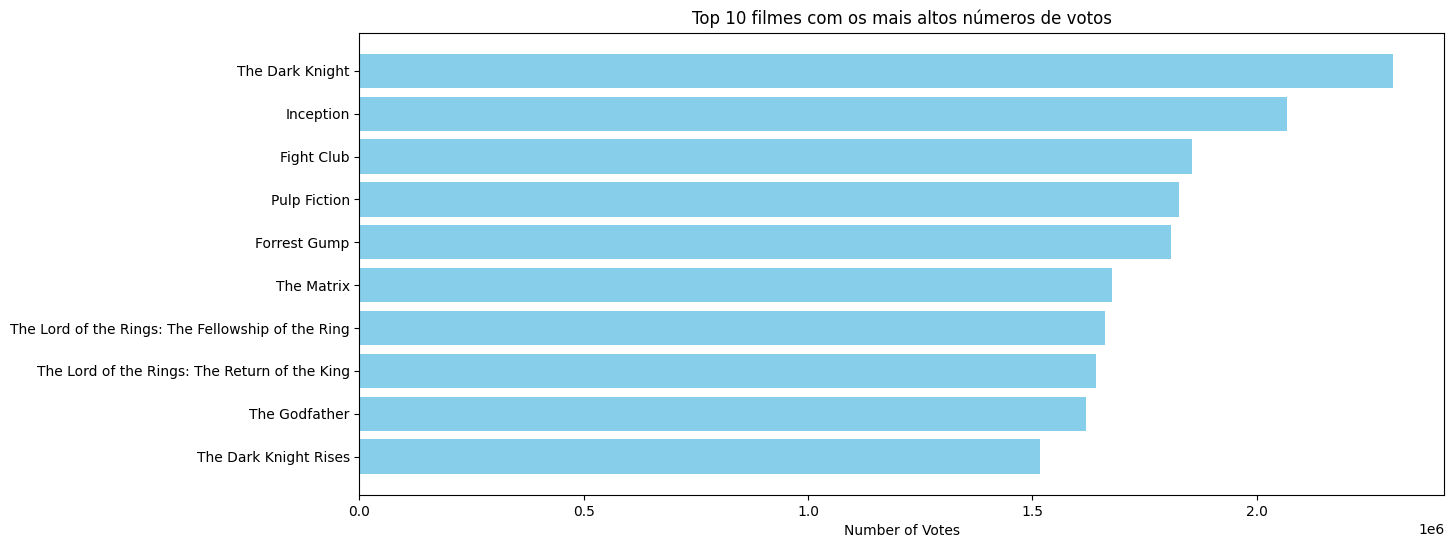

In [44]:
# Gráfico de colunas dos 10 filmes com o maior número de votos
top_voted = df.sort_values(by='No_of_Votes', ascending=False).head(10)
plt.figure(figsize=(14, 6))
plt.barh(top_voted['Series_Title'], top_voted['No_of_Votes'], color='skyblue')
plt.xlabel('Number of Votes')
plt.title('Top 10 filmes com os mais altos números de votos')
plt.gca().invert_yaxis()  # Para exibir o maior valor no topo
plt.show()

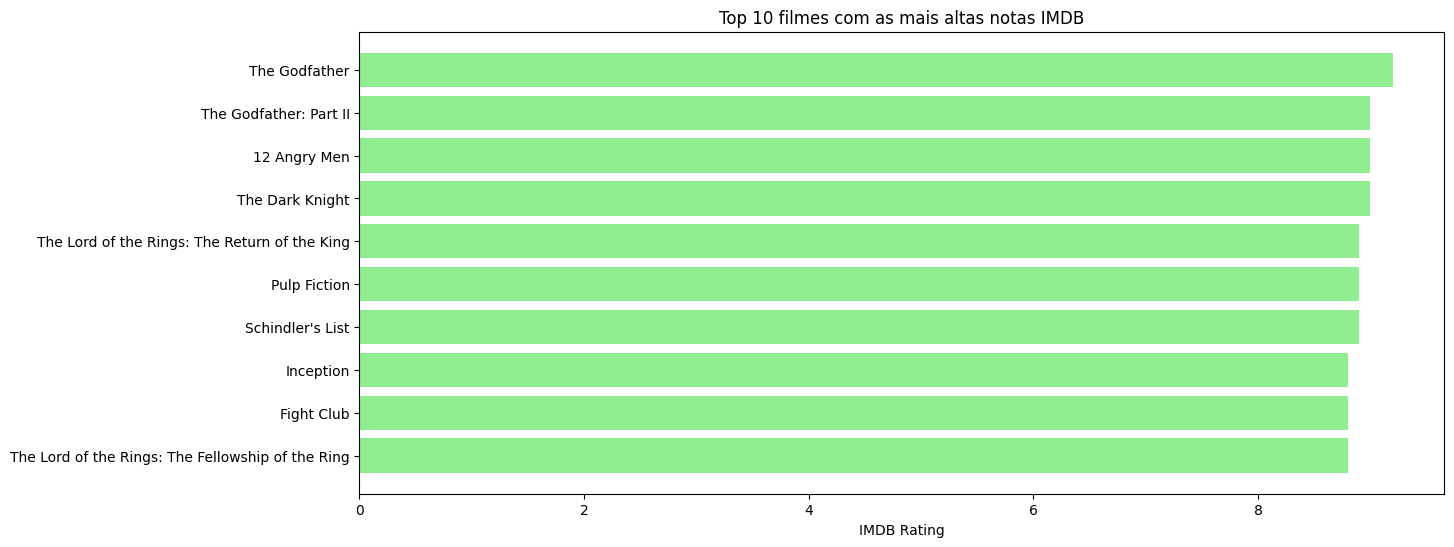

In [45]:
# Gráfico de colunas dos 10 filmes com a maior classificação IMDB
top_rated = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
plt.figure(figsize=(14, 6))
plt.barh(top_rated['Series_Title'], top_rated['IMDB_Rating'], color='lightgreen')
plt.xlabel('IMDB Rating')
plt.title('Top 10 filmes com as mais altas notas IMDB')
plt.gca().invert_yaxis()  # Para exibir o maior valor no topo
plt.show()

In [46]:
# Encontrar o valor máximo da coluna 'Meta_score'
max_meta_score = df['Meta_score'].max()

# Contar quantos filmes possuem o valor máximo de 'Meta_score'
num_max_meta_score_films = df[df['Meta_score'] == max_meta_score].shape[0]

# Exibir o resultado
print(f"Total de filmes com o valor máximo de Meta-score ({max_meta_score}): {num_max_meta_score_films}")

Total de filmes com o valor máximo de Meta-score (100.0): 12


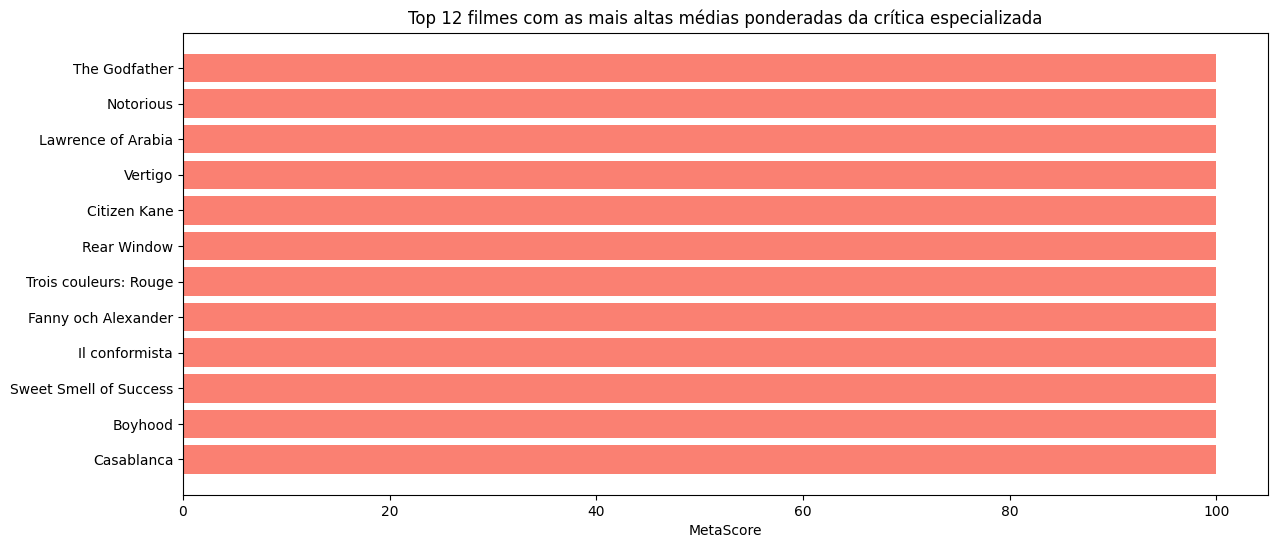

In [47]:
# Gráfico de colunas dos 12 filmes com a maior pontuação MetaScore
top_metascore = df.sort_values(by='Meta_score', ascending=False).head(12)
plt.figure(figsize=(14, 6))
plt.barh(top_metascore['Series_Title'], top_metascore['Meta_score'], color='salmon')
plt.xlabel('MetaScore')
plt.title('Top 12 filmes com as mais altas médias ponderadas da crítica especializada')
plt.gca().invert_yaxis()  # Para exibir o maior valor no topo
plt.show()

Tendo em vista os filmes que mais tiveram votos, os que possuem as maiores notas do IMDB e os que possuem as maiores médias ponderadas da crítica especializada, foi verificado quais são os longas que aparecem ao menos 2 vezes nessas relações afim de encontrar as obras cinematográficas mais bem avaliadas levando em consideração as métricas presentes nessa base de dados.

In [48]:
# Combinar todos os top 10 em uma única lista
top_movies = pd.concat([top_voted, top_rated, top_metascore]).reset_index()

# Contar a frequência de cada filme na lista
movies_counts = top_movies['Series_Title'].value_counts()

# Filtrar filmes que aparecem 2 ou mais vezes
movies_with_multiple_appearances = movies_counts[movies_counts >= 2]

# Exibir o resultado
print("Filmes que apareceram 2 ou mais vezes nos primeiros lugares das relações anteriores:")
print(movies_with_multiple_appearances)

Filmes que apareceram 2 ou mais vezes nos primeiros lugares das relações anteriores:
Series_Title
The Godfather                                        3
The Dark Knight                                      2
Fight Club                                           2
Pulp Fiction                                         2
The Lord of the Rings: The Fellowship of the Ring    2
The Lord of the Rings: The Return of the King        2
Inception                                            2
Name: count, dtype: int64


The Godfather é o filme que aparece nas 3 relações anteriores, sendo um dos mais votados (9º posição), um dos mais bem avaliados no IMDB (1º lugar) e um dos mais bem avaliados pela crítica especializada (1º lugar empatado com os outros 11 que também apresentam a média 100).

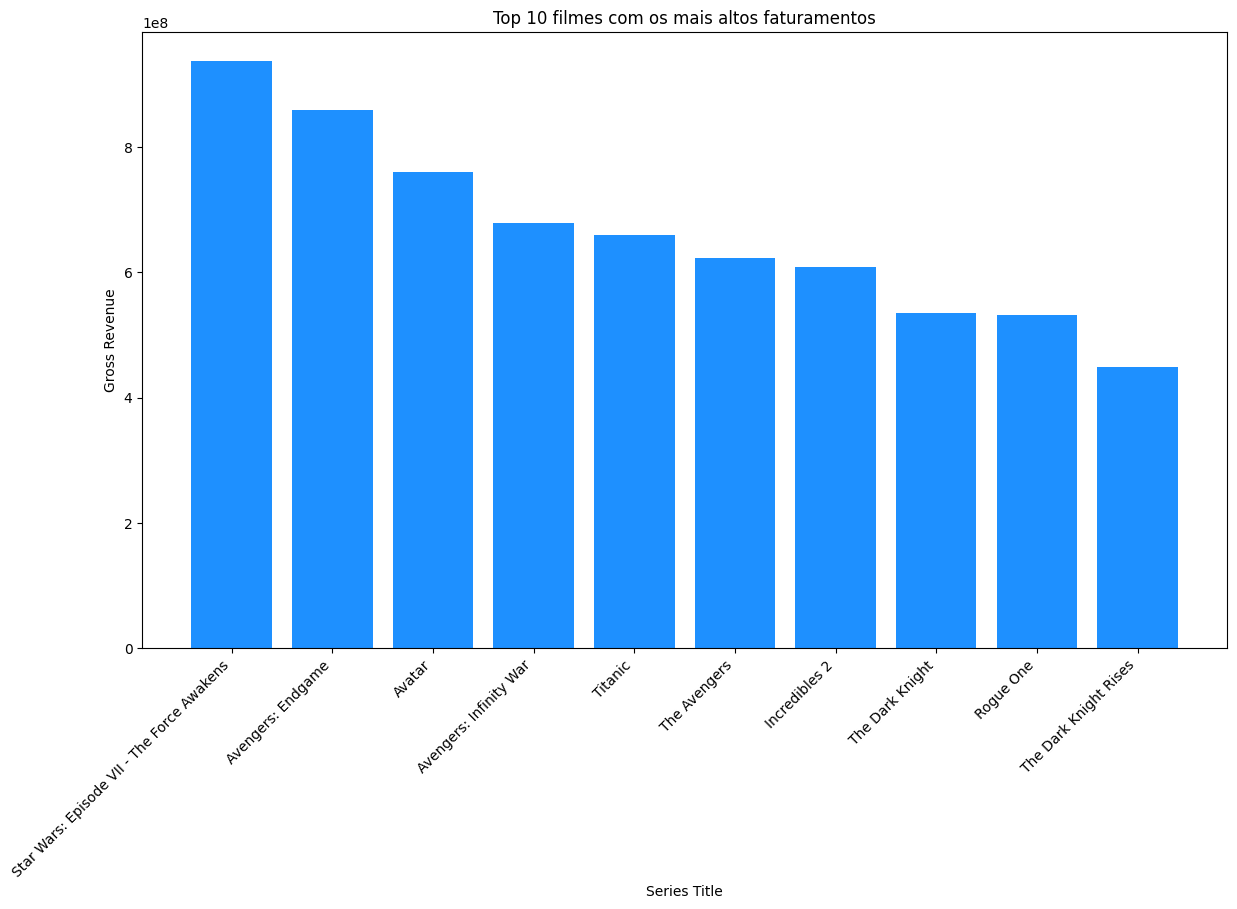

In [49]:
# Obter os 10 filmes com a maior receita bruta
top_grossing = df.sort_values(by='Gross', ascending=False).head(10)

# Criar o gráfico de colunas
plt.figure(figsize=(14, 8))
plt.bar(top_grossing['Series_Title'], top_grossing['Gross'], color='dodgerblue')
plt.xlabel('Series Title')
plt.ylabel('Gross Revenue')
plt.title('Top 10 filmes com os mais altos faturamentos')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.show()

Vendo os 10 filmes com os maiores faturamentos, pode-se então associá-los com os filmes mais bem avaliados pelas métricas dessa base de dados para que seja feita então a verificação de filmes com alto lucro nas bilheterias e que não só tenha sido popular, mas que seja bem avaliado pelos usuários do IMDB e pela crítica especializada.

In [50]:
# Combinar todos os top 10 em uma única lista
top_movies = pd.concat([top_voted, top_rated, top_metascore, top_grossing]).reset_index()

# Contar a frequência de cada filme na lista
movies_counts = top_movies['Series_Title'].value_counts()

# Filtrar filmes que aparecem 2 ou mais vezes
movies_with_multiple_appearances = movies_counts[movies_counts >= 2]

# Exibir o resultado
print("Filmes que apareceram 2 ou mais vezes em todas as relações anteriores (incluindo a de faturamento):")
print(movies_with_multiple_appearances)

Filmes que apareceram 2 ou mais vezes em todas as relações anteriores (incluindo a de faturamento):
Series_Title
The Dark Knight                                      3
The Godfather                                        3
The Lord of the Rings: The Fellowship of the Ring    2
Inception                                            2
The Lord of the Rings: The Return of the King        2
The Dark Knight Rises                                2
Pulp Fiction                                         2
Fight Club                                           2
Name: count, dtype: int64


Levando em consideração aquelas três relações anteriores mais a nova relação dos filmes que mais faturaram, obteve-se a informação de que tanto o filme The Godfather quanto o filme The Dark Knight aparecem ao menos em 3 das 4 relações. No caso, The Dark Knight é um dos filmes mais lucrativos (8ª posição) dessa base de dados e também não fica atrás nas avaliações e na populariedade, ficando em 4º lugar no ranking do IMDB e em 1º lugar no número de votos. The Godfather, por outro lado, apesar de ser um filme muito bem avaliado, não foi um dos que mais faturaram.

## Qual filme você recomendaria para uma pessoa que você não conhece?
Se a pessoa fosse alguém maior de idade, eu recomendaria fortemente o filme The Godfather, tendo em vista que ele é o mais bem avaliado dentre os mais populares (votados), sem contar muito a questão do quanto ele lucrou nas bilheterias, pois nem todos os filmes bem votados e avaliados fazem parte dos mais rentáveis. Todavia, como se trata de alguém desconhecido, posso imaginar que a pessoa seja menor de idade ou não curta filmes voltados mais para adultos seja por suas temáticas ou certas cenas. Também posso pensar que a pessoa desconhecida queira assistir algum filme com a família e que funcione para todas as idades. Por isso irei considerar os filmes com certificação G (General Audiences). Mas após fazer esse filtro, é bom entender um pouco das métricas usadas nessa base de dados: 'IMDB_Rating', 'No_of_Votes' e 'Meta_score'.

As variáveis **'IMDB_Rating'**, **'No_of_Votes'** e **'Meta_score'** são métricas comuns utilizadas para avaliar filmes e fornecem diferentes perspectivas sobre a qualidade e popularidade de um filme. Segue abaixo uma explicação detalhada sobre cada uma dessas variáveis:

### 1. IMDB_Rating

**O que é:**

O **IMDB Rating** é uma pontuação média dada pelos usuários do IMDb para um filme ou série. Esta nota é baseada nas avaliações individuais feitas pelos usuários registrados no site.

**Como é Calculado:**

- **Método de Avaliação:** Usuários do IMDb atribuem uma nota ao filme em uma escala de 1 a 10.
- **Cálculo:** A nota média é calculada usando a média ponderada das avaliações dos usuários. O IMDb utiliza um sistema de **"média ponderada"** em vez de uma simples média aritmética. Este método ajuda a evitar a manipulação das notas por um pequeno número de votos extremos.
- **Fórmula Simplificada:** A fórmula exata do IMDb para calcular a nota média é complexa e envolve "média ponderada".
  O IMDb ajusta os pesos dos votos com base na quantidade de votos e na confiança estatística dos mesmos.

**Importância:**

- **Indicador de Popularidade:** O rating fornece uma visão geral de como o público em geral avalia um filme.
- **Feedback dos Usuários:** Mostra a satisfação geral dos espectadores.

**Exemplo:** Se um filme tem um IMDB Rating de 8.5, significa que, em média, os usuários deram notas altas para o filme, e ele é geralmente bem avaliado.

---

### 2. No_of_Votes

**O que é:**

**No_of_Votes** representa o número total de avaliações que um filme recebeu dos usuários no IMDb.

**Como é Calculado:**

- **Contagem de Votos:** É uma contagem direta do número de usuários que avaliaram o filme.

**Importância:**

- **Indicador de Popularidade:** O número de votos pode ser um indicador de quão popular um filme é, ou quão amplamente ele foi visto e avaliado.
- **Validade do Rating:** Um número maior de votos pode indicar uma avaliação mais representativa da qualidade do filme, enquanto um número muito baixo pode sugerir que a avaliação pode não ser representativa.

**Exemplo:** Se um filme tem 10.000 votos, isso indica que o filme foi avaliado por 10.000 usuários.

---

### 3. Meta_score

**O que é:**

O **MetaScore** é uma nota atribuída a um filme com base em críticas de críticos especializados. É uma média ponderada das resenhas de críticos profissionais e é gerida pelo site Metacritic.

**Como é Calculado:**

- **Método de Avaliação:** Críticos especializados escrevem resenhas e atribuem notas ao filme.
- **Cálculo:** A nota do MetaScore é calculada a partir de uma média ponderada dessas avaliações. Resenhas são convertidas em uma escala de 0 a 100, e a média ponderada dessas notas é apresentada.
- **Fórmula Simplificada:** O cálculo exato envolve a média ponderada.
  O peso pode depender de fatores como a reputação do crítico.

**Importância:**

- **Indicador de Crítica Profissional:** O MetaScore fornece uma visão geral da opinião dos críticos especializados, o que pode ser útil para entender a recepção crítica de um filme.
- **Feedback de Críticos:** Reflete a opinião de especialistas da indústria sobre a qualidade do filme.

**Exemplo:** Se um filme tem um MetaScore de 75, significa que a média das resenhas dos críticos é relativamente positiva, com uma boa aceitação crítica.

---

### Resumo das Variáveis

| Variável        | O que é                                           | Como é Calculado                          | Importância                                    |
|-----------------|---------------------------------------------------|--------------------------------------------|-----------------------------------------------|
| **IMDB_Rating**  | Nota média dos usuários                         | Média ponderada das notas dos usuários    | Avaliação geral do público                   |
| **No_of_Votes**  | Número total de avaliações                       | Contagem direta de votos                  | Popularidade e representatividade do filme  |
| **Meta_score**   | Nota média dos críticos especializados          | Média ponderada das notas dos críticos     | Avaliação crítica profissional               |

### Exemplo de Base de Dados

Aqui está um exemplo simplificado de uma base de dados com essas variáveis:

| Series_Title   | IMDB_Rating | No_of_Votes | Meta_score |
|----------------|-------------|------------|-----------|
| Inception      | 8.8         | 200000     | 74        |
| The Matrix      | 8.7         | 150000     | 73        |
| The Godfather   | 9.2         | 300000     | 92        |
| Titanic         | 7.8         | 250000     | 75        |
| Interstellar    | 8.6         | 180000     | 70        |

Cada coluna fornece uma visão diferente sobre o filme e pode ser usada para análises diversas sobre a qualidade e popularidade dos filmes.

### Fontes e Referências

- **IMDB Rating:** [IMDB](https://www.imdb.com/)
- **MetaScore:** [Metacritic](https://www.metacritic.com/)

Essas métricas são frequentemente usadas em análises de filmes e podem ajudar a comparar diferentes filmes com base em critérios diferentes.

In [51]:
# Filtrar filmes com classificação 'G'
df_g = df[df['Certificate'] == 'G']

# Ordenar por 'No_of_Votes' e selecionar os 25% superiores
df_g_top_votes = df_g.nlargest(int(len(df_g) * 0.25), 'No_of_Votes')

# Ordenar por 'Meta_score' e selecionar os 25% superiores
df_g_top_votes_top_meta = df_g_top_votes.nlargest(int(len(df_g_top_votes) * 0.25), 'Meta_score')

# Ordenar por 'IMDB_Rating' e selecionar os 3 superiores
top_3_imdb_g = df_g_top_votes_top_meta.nlargest(3, 'IMDB_Rating')

# Mostrar os resultados
print(top_3_imdb_g[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Meta_score']])

                                        Series_Title  IMDB_Rating  \
3                                       12 Angry Men        9.000   
4      The Lord of the Rings: The Return of the King        8.900   
9  The Lord of the Rings: The Fellowship of the Ring        8.800   

   No_of_Votes  Meta_score  
3       689845      96.000  
4      1642758      94.000  
9      1661481      92.000  


O código acima mostra o filtro em relação aos filmes classificados como 'G" (General Audiences). Desse filtro, foi pego a parcela dos 25% mais populares por número de votos, o que mostra 1/4 dos filmes mais bem votados que são livres para todos os públicos. A partir daí, foi selecionado os 25% mais bem avaliados pela crítica especializada, afunilando ainda mais a relação de filmes, agora com populariedade alta e avaliação dos críticos especializados também alta, além da certificação G. Desses que sobraram, foi mostrado o top 3 dos que possuem as maiores notas do IMDB. No caso, apareceu o filme 12 Angry Men e dois filmes da trilogia The Lord of the Rings. Seguindo esse método, o filme mais indicado seria 12 Angry Men, mas levando em consideração que dois filmes de uma trilogia ficam logo atrás, seria interessante indicar à essa pessoa desconhecida o filme The Lord of the Rings: The Fellowship of the Ring, pois esse é o primeiro dessa saga e faria com que a pessoa tivesse de assistir os outros 2 que também são bem avaliados para poder ficar a par de toda a história.

## Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Como visto nas interpretações do gráfico de calor da matriz de correlação das variáveis numéricas, o faturamento possui uma correlação moderada (0,6) com o número de votos. Todavia, o número de votos não pode ser considerado, pois quando se fala de expectativa de faturamento, fala-se de um tempo anterior ao lançamento e os votos só surgem após. Entretanto, como visto nas relações entre gêneros, diretores e estrelas de cinema com o faturamento, pode-se concluir que o gênero, a direção e o elenco são fatores relacionados com a alta expectativa de faturamento dos filmes. Longas metragens dos gêneros aventura e ação, dirigidos pelos diretores do top 10 mostrado anteriormente, tais como Anthony Russo, Gareth Edwards, J.J. Abrams, Josh Cooley, Roger Allers e estrelados por estrelas do cinema das relações top 10 vistas anteriormente, tais como Chris Evans, Robert Downey Jr., Daisy Ridley e Sam Worthington, tem grandes chances de faturarem bem.

## Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Para responder tais questionamentos, foi aplicado métodos de processamento de linguagem natural (PLN). No caso, foi usado o TF-IDF para identificar os termos mais importantes em cada gênero.

In [52]:
# Criar uma cópia do DataFrame original
df_copy = df.copy()

# Derreter as colunas de gênero em uma única coluna
df_melted = df_copy.melt(id_vars=['Series_Title', 'Released_Year', 'Overview'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='Genre_Type', value_name='Genre')

# Remover linhas com 'Genre' nulo
df_melted = df_melted.dropna(subset=['Genre'])

# Função de pré-processamento de texto
def preprocess_text(text):
    text = text.lower()  # Converter para minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuações
    return text

# Aplicar a função de pré-processamento
df_melted['Overview'] = df_melted['Overview'].apply(preprocess_text)


In [53]:
# Função para obter as palavras mais frequentes por gênero
def get_top_words_by_genre(genre, top_n=5):
    genre_overviews = df_melted[df_melted['Genre'] == genre]['Overview']
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(genre_overviews)
    tfidf_scores = defaultdict(float)
    for doc in range(tfidf_matrix.shape[0]):
        for word, score in zip(vectorizer.get_feature_names_out(), tfidf_matrix[doc].toarray()[0]):
            tfidf_scores[word] += score
    sorted_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [word for word, score in sorted_words]

# Gêneros a serem analisados
genres = ['Adventure', 'Sci-Fi', 'Action', 'Animation', 'Fantasy']

# Obter as palavras mais frequentes por gênero
top_words_by_genre = {genre: get_top_words_by_genre(genre) for genre in genres}

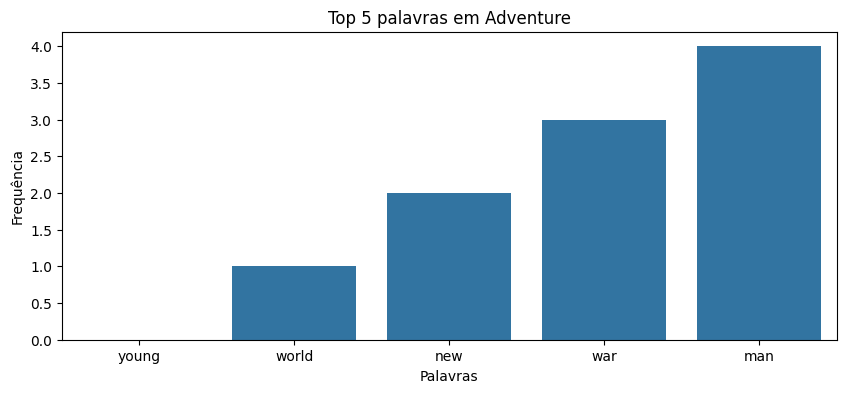

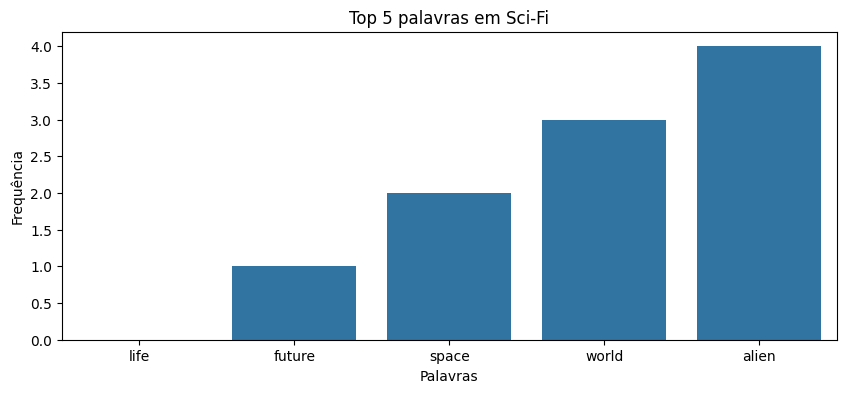

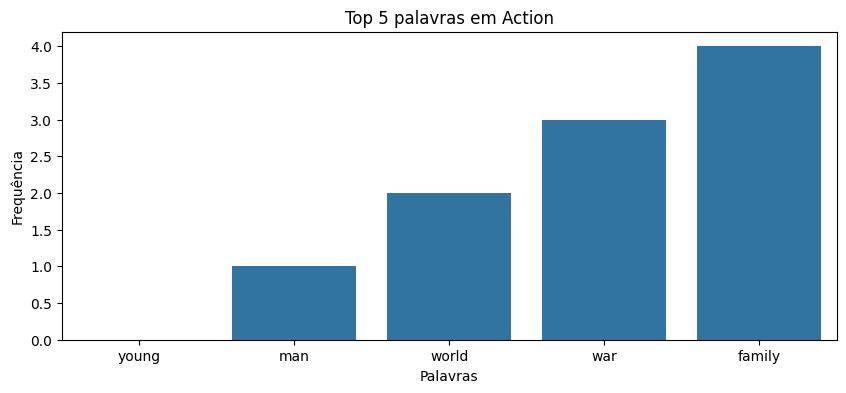

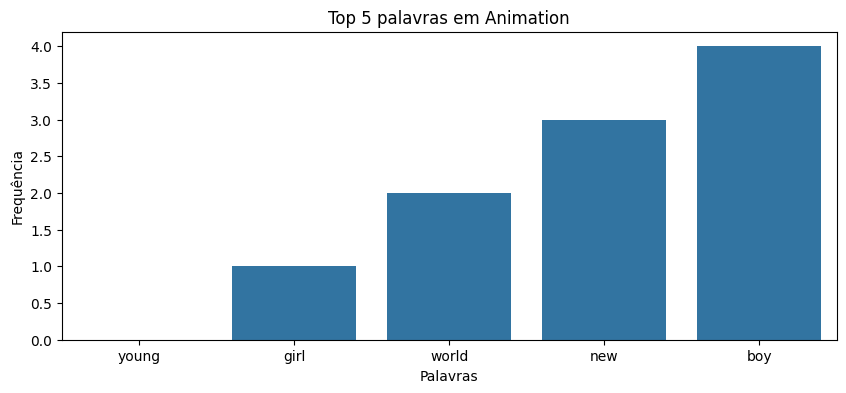

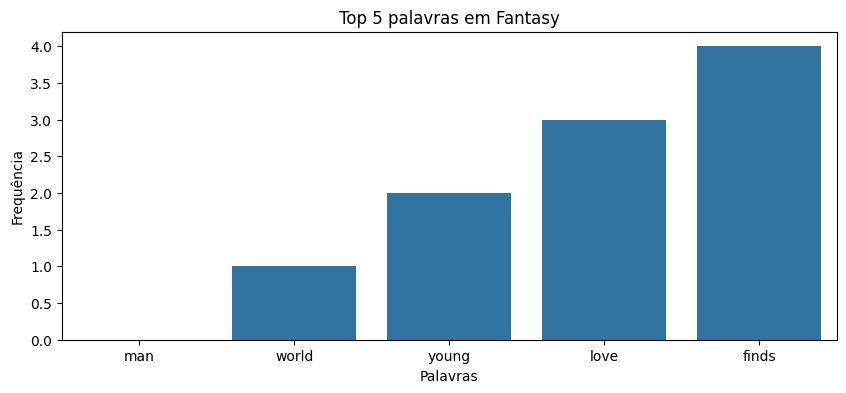

In [54]:
# Visualizar as 5 palavras mais frequentes por gênero
for genre, words in top_words_by_genre.items():
    plt.figure(figsize=(10, 4))
    sns.barplot(x=words, y=[i for i in range(len(words))])
    plt.title(f'Top 5 palavras em {genre}')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.show()

Constatando os 5 termos mais importantes para os 5 gêneros analisados, dá para relacionar algumas dessas palavras com os gêneros em questão. Se na coluna 'Overview' estiver constando as palavras 'alien' e 'space', as chances desse filme se tratar de uma ficção científica são bem alta. Podemos perceber que filmes de aventura geralmente envolvem mais homens do que mulheres ou crianças, tendo em vista que a palavra 'man' é a mais importante. Já os filmes de ação geralmente envolve famílias e guerras. Já no caso dos filmes de fantasia, os termos mais importantes 'finds' e 'love' mostram que esses filmes envolvem a busca/procura por algo e o amor por alguém ou por algo. Mesmo assim, essa análise mostra palavras importantes que aparecem em mais de um gênero, como a palavra 'world' que aparece nos 5, 'war' e 'young'. Talvez fosse mais indicado usar o N-grams para verificar expressões de duas ou mais palavras que se repetem para melhor entedimento do contexto dos textos da variável 'Overview' para facilitar na hora de inferir o gênero. Todavia, um modelo do tipo DistilBERT foi programado e excecutado mais abaixo.

In [ ]:
# Executar caso haja necessidade
# pip install transformers torch datasets

In [ ]:
# Executar caso haja necessidade
# pip install transformers[torch]

In [ ]:
# Executar caso haja necessidade
# !pip install accelerate -U

In [ ]:
# Executar caso haja necessidade
# !pip install torch --upgrade
# !pip install transformers[torch] --upgrade
# !pip install accelerate --upgrade

  Using cached transformers-4.42.4-py3-none-any.whl (9.3 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [ ]:
# Filtrar apenas os gêneros desejados
df_filtered = df_melted[df_melted['Genre'].isin(genres)]

# Dividir os dados em treino e teste
train_df, test_df = train_test_split(df_filtered[['Overview', 'Genre']], test_size=0.2, random_state=42, stratify=df_filtered['Genre'])

# Converter para Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Carregar o tokenizer e modelo DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(genres))

# Tokenização
def tokenize(batch):
    return tokenizer(batch['Overview'], padding=True, truncation=True,  # Manter os parâmetros de tokenização existentes
                  return_tensors='pt')  # Linha adicionada para retornar tensores PyTorch

train_dataset = train_dataset.map(tokenize, batched=True, batch_size=len(train_dataset))
test_dataset = test_dataset.map(tokenize, batched=True, batch_size=len(test_dataset))

# Mapear gêneros para rótulos numéricos
label2id = {label: i for i, label in enumerate(genres)}
id2label = {i: label for label, i in label2id.items()}

def map_labels(example):
    example['labels'] = label2id[example['Genre']] # Criar uma coluna de 'rótulos' com rótulos numéricos
    return example

train_dataset = train_dataset.map(map_labels, batched=False)
test_dataset = test_dataset.map(map_labels, batched=False)

# Formatar a coluna do rótulo
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])  # Incluir 'rótulos' como entrada do modelo
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])  # Incluir 'rótulos' como entrada do modelo

# Definir os argumentos de treinamento
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01
)

# Treinador
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Treinar o modelo
trainer.train()

# Avaliar o modelo
results = trainer.evaluate()
print(results)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/480 [00:00<?, ? examples/s]

Map:   0%|          | 0/120 [00:00<?, ? examples/s]

Map:   0%|          | 0/480 [00:00<?, ? examples/s]

Map:   0%|          | 0/120 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.407052
2,No log,1.429407
3,No log,1.440033


{'eval_loss': 1.4400334358215332, 'eval_runtime': 10.071, 'eval_samples_per_second': 11.915, 'eval_steps_per_second': 1.489, 'epoch': 3.0}


In [ ]:
# Predições no conjunto de testes
predictions = trainer.predict(test_dataset)

# Transformar os rótulos reais e previstos
y_true = np.array(test_df['Genre'])
y_pred = np.argmax(predictions.predictions, axis=1)

# Converter rótulos previstos em nomes de gênero
y_pred_labels = [id2label[pred] for pred in y_pred] # Mapear índices previstos para nomes de gêneros usando id2label

# Relatório de classificação
print(classification_report(y_true, y_pred_labels, target_names=genres)) # Usar nomes de gênero para y_true e y_pred

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred_labels) # Usar nomes de gênero para y_true e y_pred
print(conf_matrix)

              precision    recall  f1-score   support

   Adventure       0.39      0.42      0.41        38
      Sci-Fi       0.27      0.41      0.33        39
      Action       0.00      0.00      0.00        17
   Animation       0.00      0.00      0.00        13
     Fantasy       0.21      0.31      0.25        13

    accuracy                           0.30       120
   macro avg       0.17      0.23      0.20       120
weighted avg       0.23      0.30      0.26       120

[[16 15  0  0  7]
 [15 16  0  0  8]
 [ 2 14  0  1  0]
 [ 2 11  0  0  0]
 [ 6  3  0  0  4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Relatório de Classificação

O relatório de classificação apresenta as seguintes métricas para cada gênero:

- **Precision (Precisão)**: A proporção de previsões corretas para uma determinada classe em relação ao total de previsões feitas para essa classe.
- **Recall (Sensibilidade)**: A proporção de previsões corretas para uma determinada classe em relação ao total de amostras reais dessa classe.
- **F1-Score**: A média harmônica entre a precisão e o recall. Fornece uma única métrica de desempenho combinada.
- **Support**: O número de amostras reais de cada classe no conjunto de teste.

Detalhando as métricas para cada gênero, é obtido o seguinte:

- **Adventure**:
  - Precision: 0.39
  - Recall: 0.42
  - F1-Score: 0.41
  - Support: 38

- **Sci-Fi**:
  - Precision: 0.27
  - Recall: 0.41
  - F1-Score: 0.33
  - Support: 39

- **Action**:
  - Precision: 0.00
  - Recall: 0.00
  - F1-Score: 0.00
  - Support: 17

- **Animation**:
  - Precision: 0.00
  - Recall: 0.00
  - F1-Score: 0.00
  - Support: 13

- **Fantasy**:
  - Precision: 0.21
  - Recall: 0.31
  - F1-Score: 0.25
  - Support: 13

- **Overall Accuracy**: 0.30 (30% de acurácia geral)
- **Macro Average**:
  - Precision: 0.17
  - Recall: 0.23
  - F1-Score: 0.20
- **Weighted Average**:
  - Precision: 0.23
  - Recall: 0.30
  - F1-Score: 0.26

### Interpretação das Métricas

- **Adventure** e **Sci-Fi** têm desempenho relativamente melhor em comparação aos outros gêneros, mas ainda são baixos.
- **Action** e **Animation** têm precisão, recall e F1-score de 0, o que indica que o modelo não conseguiu prever corretamente nenhuma amostra dessas classes.
- **Fantasy** tem desempenho muito baixo, mas não nulo.

Os resultados gerais são insatisfatórios, indicando que o modelo tem dificuldades em classificar corretamente os gêneros dos filmes.

### Matriz de Confusão

A matriz de confusão fornece uma visão detalhada das previsões corretas e incorretas:

```
[[16 15  0  0  7]
 [15 16  0  0  8]
 [ 2 14  0  1  0]
 [ 2 11  0  0  0]
 [ 6  3  0  0  4]]
```

- **Primeira linha (Adventure)**:
  - 16 previsões corretas como Adventure.
  - 15 amostras de Adventure foram classificadas incorretamente como Sci-Fi.
  - 7 amostras de Adventure foram classificadas incorretamente como Fantasy.

- **Segunda linha (Sci-Fi)**:
  - 16 previsões corretas como Sci-Fi.
  - 15 amostras de Sci-Fi foram classificadas incorretamente como Adventure.
  - 8 amostras de Sci-Fi foram classificadas incorretamente como Fantasy.

- **Terceira linha (Action)**:
  - 2 amostras de Action foram classificadas incorretamente como Adventure.
  - 14 amostras de Action foram classificadas incorretamente como Sci-Fi.
  - 1 amostra de Action foi classificada incorretamente como Animation.

- **Quarta linha (Animation)**:
  - 2 amostras de Animation foram classificadas incorretamente como Adventure.
  - 11 amostras de Animation foram classificadas incorretamente como Sci-Fi.

- **Quinta linha (Fantasy)**:
  - 6 amostras de Fantasy foram classificadas incorretamente como Adventure.
  - 3 amostras de Fantasy foram classificadas incorretamente como Sci-Fi.
  - 4 previsões corretas como Fantasy.

### Conclusão

- **Desempenho Geral**: O modelo tem dificuldades significativas em classificar corretamente os gêneros dos filmes. A baixa precisão, recall e F1-score, especialmente para Action e Animation, indicam que o modelo está lutando para diferenciar entre os gêneros.
- **Erros Comuns**: O modelo frequentemente confunde Adventure e Sci-Fi, sugerindo que as descrições de filmes desses gêneros podem ser bastante semelhantes.
- **Melhorias Necessárias**: Melhorar o desempenho pode requerer:
  - Aumentar a quantidade de gêneros no modelo.
  - Aumentar a quantidade de dados de treinamento para cada gênero.
  - Refinar o pré-processamento dos textos.
  - Ajustar hiperparâmetros do modelo.
  - Usar técnicas de aumento de dados (data augmentation) para melhorar a representatividade das classes menos frequentes.

Esses passos podem ajudar a melhorar o desempenho do modelo na classificação dos gêneros de filmes. Essas melhorias não puderam ser executadas devido ao tempo reduzido para a entrega do desafio.

## Modelos de regressão para previsão de notas IMDB

Para o desenvolvimento do melhor modelo de previsão de notas do IMDB, foi selecionado todas as variáveis exceto 'Series_Title', 'Released_Year', 'Overview' e o próprio 'IMDB_Rating' que serviu como target (alvo da previsão). O nome do filme é como um id e por isso não seria muito bem aproveitado em modelos de machine learning. O ano de lançamento não é importante para o desenvolvimento desses modelos, uma vez que isso é só um detalhe e não necessariamente algo a ser considerado (nem possui correlação). A sinopse resumida dos filmes foi descartada por conter string grandes que demandariam algoritmos de PLN e afins para relacionar o conteúdo semântico e léxico com a previsão da nota IMDB.

Após essas seleções, foi dividido a base de dados em base de treino e base de teste, além de definir os pré processadores e os  três pipelines dos três modelos de regressão diferentes, pois o que queria ser previsto era um valor e não uma classificação. Com isso, os três modelos (Linar Regression, Random Forest Regressor, Gradient Boosting Regressor) foram treinados e avalidos seguindo as métricas de regressão Mean Absolut Error (MAE), Mean Sqaured Error (MSE) e Root Mean Squared Error (RMSE).

In [55]:
# Selecionar variáveis
features = ['Certificate', 'Runtime_min', 'Genre1', 'Genre2', 'Genre3',
            'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']
target = 'IMDB_Rating'

# Dividir os dados em treino e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o pré-processador
numeric_features = ['Runtime_min', 'Meta_score', 'No_of_Votes', 'Gross']
categorical_features = ['Certificate', 'Genre1', 'Genre2', 'Genre3', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Definir pipelines para os modelos
# Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Gradient Boosting Regressor
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(random_state=42))])


In [56]:
# Função para treinar e avaliar o modelo
def train_and_evaluate(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Avaliar os modelos
lr_mae, lr_mse, lr_rmse = train_and_evaluate(lr_pipeline, X_train, X_test, y_train, y_test)
rf_mae, rf_mse, rf_rmse = train_and_evaluate(rf_pipeline, X_train, X_test, y_train, y_test)
gb_mae, gb_mse, gb_rmse = train_and_evaluate(gb_pipeline, X_train, X_test, y_train, y_test)

print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}")
print(f"Random Forest Regressor - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}")
print(f"Gradient Boosting Regressor - MAE: {gb_mae}, MSE: {gb_mse}, RMSE: {gb_rmse}")

Linear Regression - MAE: 0.16913171272863342, MSE: 0.04308363607036785, RMSE: 0.2075659800409688
Random Forest Regressor - MAE: 0.15877500000000005, MSE: 0.04079506499999987, RMSE: 0.2019778824525098
Gradient Boosting Regressor - MAE: 0.1636940088487556, MSE: 0.041408458474505486, RMSE: 0.20349068399930617


Após obter os resultados acima das três métricas de regressão para os três modelos testados, antes de escolher o melhor modelo em questão, foi feita a verificação dos melhores parâmetros dos dois melhores modelos (Random Forest Regressor e Gradient Boosting Regressor) usando tanto o Random Search (buscas aleatórias dos melhores hiper parâmetros sem pesar tanto no custo computacional) quanto o Grid Search (busca exaustiva dos melhores hiper parâmetros, que pesa computacionalmente, mas garante melhores resultados). Por enquanto, o melhor modelo é o Random Forest Regressor com variação de erro na casa dos 0,2020 aproximadamente tanto para mais quanto para menos (extraído da métrica RMSE).

## Otimização de hiper parâmetros por Random Search e Grid Search

In [ ]:
# Parâmetros para Random Search
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Random Search para Random Forest
rf_random_search = RandomizedSearchCV(rf_pipeline, param_distributions=rf_param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Random Search para Gradient Boosting
gb_random_search = RandomizedSearchCV(gb_pipeline, param_distributions=gb_param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)
gb_random_search.fit(X_train, y_train)

print(f"Best Random Forest Params: {rf_random_search.best_params_}")
print(f"Best Gradient Boosting Params: {gb_random_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Random Forest Params: {'regressor__n_estimators': 50, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 4, 'regressor__max_depth': 10}
Best Gradient Boosting Params: {'regressor__n_estimators': 200, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.1}


In [ ]:
# Parâmetros para Grid Search
rf_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

gb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.1, 0.2],
    'regressor__max_depth': [3, 5]
}

# Grid Search para Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Grid Search para Gradient Boosting
gb_grid_search = GridSearchCV(gb_pipeline, param_grid=gb_param_grid, cv=3, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print(f"Best Random Forest Params: {rf_grid_search.best_params_}")
print(f"Best Gradient Boosting Params: {gb_grid_search.best_params_}")

Best Random Forest Params: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Best Gradient Boosting Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}


## Modelos otimizados com os resultados das otimizações

In [57]:
# Random Forest Regressor com melhores parâmetros do Random Search
rf_pipeline_random_search = Pipeline(steps=[('preprocessor', preprocessor),
                                            ('regressor', RandomForestRegressor(
                                                n_estimators=50,
                                                max_depth=10,
                                                min_samples_split=2,
                                                min_samples_leaf=4,
                                                random_state=42))])

# Treinar e avaliar o modelo
rf_pipeline_random_search.fit(X_train, y_train)
y_pred_rf_random_search = rf_pipeline_random_search.predict(X_test)

rf_mae_random_search = mean_absolute_error(y_test, y_pred_rf_random_search)
rf_mse_random_search = mean_squared_error(y_test, y_pred_rf_random_search)
rf_rmse_random_search = np.sqrt(rf_mse_random_search)

print(f"Random Forest Regressor (Random Search) - MAE: {rf_mae_random_search}, MSE: {rf_mse_random_search}, RMSE: {rf_rmse_random_search}")

Random Forest Regressor (Random Search) - MAE: 0.1602539430220599, MSE: 0.040623635814915335, RMSE: 0.20155305955235542


In [58]:
# Gradient Boosting Regressor com melhores parâmetros do Random Search
gb_pipeline_random_search = Pipeline(steps=[('preprocessor', preprocessor),
                                            ('regressor', GradientBoostingRegressor(
                                                n_estimators=200,
                                                max_depth=3,
                                                learning_rate=0.1,
                                                random_state=42))])

# Treinar e avaliar o modelo
gb_pipeline_random_search.fit(X_train, y_train)
y_pred_gb_random_search = gb_pipeline_random_search.predict(X_test)

gb_mae_random_search = mean_absolute_error(y_test, y_pred_gb_random_search)
gb_mse_random_search = mean_squared_error(y_test, y_pred_gb_random_search)
gb_rmse_random_search = np.sqrt(gb_mse_random_search)

print(f"Gradient Boosting Regressor (Random Search) - MAE: {gb_mae_random_search}, MSE: {gb_mse_random_search}, RMSE: {gb_rmse_random_search}")

Gradient Boosting Regressor (Random Search) - MAE: 0.1626243076904028, MSE: 0.040551804695206, RMSE: 0.20137478664223582


In [59]:
# Random Forest Regressor com melhores parâmetros do Grid Search
rf_pipeline_grid_search = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', RandomForestRegressor(
                                              n_estimators=200,
                                              max_depth=20,
                                              min_samples_split=5,
                                              min_samples_leaf=2,
                                              random_state=42))])

# Treinar e avaliar o modelo
rf_pipeline_grid_search.fit(X_train, y_train)
y_pred_rf_grid_search = rf_pipeline_grid_search.predict(X_test)

rf_mae_grid_search = mean_absolute_error(y_test, y_pred_rf_grid_search)
rf_mse_grid_search = mean_squared_error(y_test, y_pred_rf_grid_search)
rf_rmse_grid_search = np.sqrt(rf_mse_grid_search)

print(f"Random Forest Regressor (Grid Search) - MAE: {rf_mae_grid_search}, MSE: {rf_mse_grid_search}, RMSE: {rf_rmse_grid_search}")

Random Forest Regressor (Grid Search) - MAE: 0.1582545534569654, MSE: 0.03989994955500868, RMSE: 0.1997497172839268


In [60]:
# Gradient Boosting Regressor com melhores parâmetros do Grid Search
gb_pipeline_grid_search = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', GradientBoostingRegressor(
                                              n_estimators=200,
                                              max_depth=3,
                                              learning_rate=0.1,
                                              random_state=42))])

# Treinar e avaliar o modelo
gb_pipeline_grid_search.fit(X_train, y_train)
y_pred_gb_grid_search = gb_pipeline_grid_search.predict(X_test)

gb_mae_grid_search = mean_absolute_error(y_test, y_pred_gb_grid_search)
gb_mse_grid_search = mean_squared_error(y_test, y_pred_gb_grid_search)
gb_rmse_grid_search = np.sqrt(gb_mse_grid_search)

print(f"Gradient Boosting Regressor (Grid Search) - MAE: {gb_mae_grid_search}, MSE: {gb_mse_grid_search}, RMSE: {gb_rmse_grid_search}")

Gradient Boosting Regressor (Grid Search) - MAE: 0.1626243076904028, MSE: 0.040551804695206, RMSE: 0.20137478664223582


Com os dois modelos otimizados tanto pelo Random Search, quanto pelo Grid Search, constatou-se que o melhor modelo é o Random Forest Regressor otimizado pelo Grid Search. Esse modelo apresentou uma variação de erro de 0.1997 aproximadamente tanto para mais quanto para menos, enquanto os outros permaneceram na casa dos 0,200 para cima.

## Usando o melhor modelo com os dados do filme **The Shawshank Redemption**

Primeiramente, o modelo escolhido foi salvo como um arquivo .pkl.

In [61]:
# Salvar o modelo em um arquivo .pkl
joblib.dump(rf_pipeline_grid_search, 'regression_model_imdb_rating.pkl')

['regression_model_imdb_rating.pkl']

Agora, supondo um filme com as características abaixo, foi previsto a nota do IMDB usando o modelo salvo no formato .pkl.

In [64]:
# Carregar o modelo do arquivo .pkl
model = joblib.load('regression_model_imdb_rating.pkl')

# Dados do filme "The Shawshank Redemption"
film_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Função para tratar os dados do filme
def preprocess_film_data(film_data):
    # Ajustar 'Certificate'
    def adjust_certificate(value):
        if value in ['U', 'G', 'TV-G']:
            return 'G'
        elif value in ['PG', 'GP', 'TV-PG', '12A', '12', 'UA', 'U/A']:
            return 'PG'
        elif value in ['PG-13', 'TV-13', 'TV-14', '13', '14', '15', '16']:
            return 'PG-13'
        elif value in ['R', 'A', 'TV-MA', 'NC-17', '17', '18']:
            return 'R'
        else:
            return 'Unrated'

    film_data['Certificate'] = adjust_certificate(film_data['Certificate'])

    # Ajustar 'Runtime'
    film_data['Runtime_min'] = int(film_data['Runtime'].replace(' min', ''))

    # Ajustar 'Gross'
    film_data['Gross'] = float(film_data['Gross'].replace(',', ''))

    # Dividir 'Genre' em 'Genre1', 'Genre2', 'Genre3'
    genres = film_data['Genre'].split(',')
    film_data['Genre1'] = genres[0].strip()
    film_data['Genre2'] = genres[1].strip() if len(genres) > 1 else None
    film_data['Genre3'] = genres[2].strip() if len(genres) > 2 else None

    return film_data

# Preprocessar os dados do filme
film_data = preprocess_film_data(film_data)

# Criar um DataFrame com os dados do filme
film_df = pd.DataFrame([film_data])

# Selecionar as colunas necessárias
features = ['Released_Year', 'Certificate', 'Runtime_min', 'Genre1', 'Genre2', 'Genre3',
            'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']

film_df = film_df[features]

# Fazer a previsão da nota IMDB
imdb_rating_prediction = model.predict(film_df)
print(f"Nota IMDB prevista para o filme 'The Shawshank Redemption': {imdb_rating_prediction[0]}")

Nota IMDB prevista para o filme 'The Shawshank Redemption': 8.76840138888889


O modelo em questão previu que a nota IMDB do filme The Shawshank Redemption seria de 8,7 aproximadamente. Pesquisando, pode-se verificar que em julho de 2024, esse filme possui uma nota IMDB de 9,3.

Referência: [The Shawshank Redemption](https://www.imdb.com/title/tt0111161/?ref_=nv_sr_srsg_0_tt_5_nm_3_in_0_q_the%2520shaw)

In [63]:
# Valores reais e previstos
valor_real = 9.3
valor_previsto = 8.7

# Calcular o erro percentual
erro_percentual = abs((valor_real - valor_previsto) / valor_real) * 100
print(f"Erro percentual: {erro_percentual:.2f}%")

Erro percentual: 6.45%


Com um erro percentual de aproximadamente 6.45%, o modelo apresenta um erro baixo.

## Melhoria do Modelo
Para melhorar o modelo, as seguintes estratégias podem ser consideradas:

1. Mais Dados de Treinamento: Aumentar a quantidade de dados de treinamento pode ajudar a melhorar a precisão do modelo.

2. Melhoria no Pré-processamento:

- Feature Engineering: Criar novas variáveis que podem capturar informações importantes.

- Tratamento de Outliers: Remover ou ajustar outliers nos dados.

- Imputação de Dados Faltantes: Melhorar a imputação dos valores ausentes.

3. Ajustes nos Hiperparâmetros: Realizar uma busca mais extensiva nos hiperparâmetros usando Grid Search ou Random Search.

4. Modelos Alternativos:

- Testar outros algoritmos de regressão, como XGBoost, LightGBM, ou modelos de redes neurais.

5. Cross-Validation:

- Utilizar validação cruzada para garantir que o modelo não está superajustando aos dados de treino.